In [2]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, explained_variance_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm, naive_bayes
import requests
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from env import api_key
import time
import json
pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.reset_option("display.max_rows", "display.max_columns")
import prepare
import re
from time import sleep

In [ ]:
# Acquire

In [ ]:
def get_match_info(match_ids, api_key, username, time = 20):
    """
    This function takes in a list of match ids and iterates through them. For each iteration,
    it will make two api calls and retrieve the necessary information for our project.
    
    Two json lists will be created, and once all the info has been gathered for each match id,
    this function will save both json lists for future reference. 
    
    This function also takes in a username string. This will be used for naming the saved files.
    
    Finally, this function will funnel the resulting json lists into a prepare function and
    return a complete df.
    
    The time parameter is used in the prepare function that will be called at the end
    and represents the timeframe of the data we want to gather and prepare.
    The default value is 20 for the 20 minute mark of the match.
    
    """
    
    #Create an empty list to store the timeline json data
    timeline_data = []
    
    #Create an empty list to store the other json data
    game_data = []
    
    #Set up main url
    url = 'https://americas.api.riotgames.com/'
    
    #Create a count var
    n = 0
    
    #Store the length of the match_ids list in a var
    match_count = len(match_ids)
    
    #Loop through each match_id
    for match in match_ids:
        #Update the count var
        n += 1
        
        #After every 50 match ids (100 total requests), wait 150 seconds (2.5 minutes)
        if n % 50 == 0:
            print(f'Completed {n} of {match_count} match IDs.')
            print(f'Waiting 150 seconds...\n')
            
            #Sleep 150 seconds
            sleep(150)
            
            print('Continuing!\n')
        
        ############################# TIMELINE DATA #######################
        #Set up timeline url
        timeline_query = f'lol/match/v5/matches/{match}/timeline/?api_key={api_key}'
        
        #Grab timeline json data
        timeline_response = requests.get(url + timeline_query)
        
        #Check response and leave a status message
        if timeline_response.status_code != 200:
            print(f'Something went wrong getting TIMELINE DATA! Status Code {response.status_code} for match ID: {match}.')
            print(f'Skipping this match ID.\n')
            continue

        #Turn it into json format
        timeline_json = timeline_response.json()
        
        #Append this data to the timeline_data list
        timeline_data.append(timeline_json)
        
        ############################# OTHER GAME DATA #######################
        #Set up game data url
        game_query = f'lol/match/v5/matches/{match}?api_key={api_key}'
        
        #Grab game json data
        game_response = requests.get(url + game_query)
        
        #Check response and leave a status message.
        if game_response.status_code != 200:
            print(f'Something went wrong getting OTHER GAME DATA! Status Code {response.status_code} for match ID: {match}.')
            print(f'Skipping this match ID and REMOVING PREVIOUS TIMELINE ENTRY.\n')
            
            #Remove the last entry in the timeline_data list
            timeline_data.pop()
            continue
        
        #Turn it into json format
        game_json = game_response.json()
        
        #Append this data to the game_data list
        game_data.append(game_json)
        
    ################################## END LOOP ##############################
    
    #Now that all of the json data has been gathered, save each file for future reference
    
    #Save timeline data.
    #First, convert it to a df
    timeline_df = pd.DataFrame(timeline_data)
    
    #Save as csv file. Use username string to identify whose file it is
    timeline_df.to_json(f'timeline_data_{username}.json')
    
    #Print status message
    print(f'Created timeline_data_{username}.json')
    
    #Save other game data
    #First, convert it to a df
    game_df = pd.DataFrame(game_data)
    
    #Save as csv file. Use username string to identify whose file it is
    game_df.to_json(f'other_game_data_{username}.json')
    
    #Print status message
    print(f'Created other_game_data_{username}.json\n')
    
    ################################ PREPARE DATA #########################
    
    #The following section will funnel the data into the prepare function
    #Written by Joshua C.
    
    #Leave a status message
    print('Preparing the data...\n')
    
    #Begin preparing the data
    df = prepare.prepare(timeline_data, game_data, time)
    
    #Finally, return the prepared df
    return df

In [ ]:
#IMPORT 
df = pd.read_csv('match_ids.csv')

In [ ]:
# make the players name column into a series
match_ids = list(df['0'])[3002:4001]

In [ ]:
username = 'chris'

In [ ]:
get_match_info(match_ids,api_key,username)

In [41]:
df = pd.read_json('timeline_data_chris.json')

ValueError: Unexpected character found when decoding 'true'

In [3]:
timeline_list = df.to_dict(orient = 'records')

In [4]:
df2 = pd.read_json('other_game_data_chris.json')

In [5]:
game_data = df2.to_dict(orient = 'records')

In [6]:
df = prepare.prepare(timeline_list, game_data, time)

TypeError: '<=' not supported between instances of 'float' and 'module'

In [6]:
df = pd.read_csv('bryant_games.csv')

In [8]:
df

,Unnamed: 0,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_8,deathsplayer_9,dragon_team200,gameMode,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,inhibs_lost_team100,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,riftherald_team200,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,assistsplayer_4,baron_team200,deathsplayer_10,deathsplayer_7,dragon_team100,inhibs_lost_team200,riftherald_team100,baron_team100,killsplayer_0,team_deathsplayer_100,team_deathsplayer_200,team_goldPerSecond_100,team_goldPerSecond_200,team_jungleMinionsKilled_100,team_jungleMinionsKilled_200,team_killsplayer_100,team_killsplayer_200,team_level_100,team_level_200,team_magicDamageDoneToChampions_100,team_magicDamageDoneToChampions_200,team_minionsKilled_100,team_minionsKilled_200,team_physicalDamageDoneToChampions_100,team_physicalDamageDoneToChampions_200,team_timeEnemySpentControlled_100,team_timeEnemySpentControlled_200,team_totalDamageDoneToChampions_100,team_totalDamageDoneToChampions_200,team_totalGold_100,team_totalGold_200,team_trueDamageDoneToChampions_100,team_trueDamageDoneToChampions_200,team_ward_player_100,team_ward_player_200,team_assistsplayer_10

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Columns: 209 entries, Unnamed: 0 to team_xp_200
dtypes: float64(175), int64(31), object(3)
memory usage: 1.2+ MB


- Target = Winning_Team

Questions to research
Univariate Study
- Ward score effects the outcome
- assists effects the outcome 
- damage by magic effects the outcome
- buildings effect the outcome
- xp gained effects the outcome
- number of inhibitors lost effects the outcome
- inhibitor lost team 100, team_jungleMinionsKilled_100, team_killsplayer_100, team_level_100, team_minionsKilled_100.
- repeat above but for 200 team

Bivariate Study
- winning team and blue team level > 50, also < 50
- same for red team
- team_magicDamageDoneToChampions_100 > the average, also < average
- run same for 200
- winning team and team_physicalDamageDoneToChampions_100 > average, also < average
- run same for 200

In [14]:
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

gameMode       object
gameType       object
gameVersion    object
dtype: object

In [15]:
def summarize_df(df):
    print('-----Head-------')
    print(df.head(3))
    print('-----shape------')
    print('{} rows and {} columns'.format(df.shape[0], df.shape[1]))
    print('---info---')
    print(df.info())
    print(df.describe())
    print('----Catagorical Variables----')
    print(df.select_dtypes(include='object').columns.tolist())
    print('----Continous  Variables----')
    print(df.select_dtypes(exclude='object').columns.tolist())
    print('--nulls--')
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    print('=====================================================')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort=False))
    print('=====================================================')
    df = df.replace(r'^\s*$', np.NaN, regex=True)
    print(df.isna().sum())


In [16]:
summarize_df(df)

-----Head-------
   Unnamed: 0  assistsplayer_1  assistsplayer_10  assistsplayer_2  \
0           0              1.0               7.0              4.0   
1           1              2.0               7.0              7.0   
2           2              1.0              11.0              3.0   

   assistsplayer_3  assistsplayer_5  assistsplayer_6  assistsplayer_7  \
0              1.0              4.0              7.0              3.0   
1              6.0             16.0              0.0              5.0   
2              3.0              4.0              3.0              9.0   

   assistsplayer_8  assistsplayer_9  currentGold_1  currentGold_10  \
0              7.0              5.0           28.0           208.0   
1              5.0              6.0          343.0           195.0   
2              2.0              5.0         3176.0           303.0   

   currentGold_2  currentGold_3  currentGold_4  currentGold_5  currentGold_6  \
0           80.0          522.0          593.0      

       Unnamed: 0  assistsplayer_1  assistsplayer_10  assistsplayer_2  \
count   723.00000       723.000000        723.000000       723.000000   
mean    361.00000         2.951591          7.518672         4.562932   
std     208.85641         2.347659          3.787005         2.708325   
min       0.00000         0.000000          0.000000         0.000000   
25%     180.50000         1.000000          5.000000         3.000000   
50%     361.00000         2.000000          7.000000         4.000000   
75%     541.50000         4.000000         10.000000         6.000000   
max     722.00000        15.000000         24.000000        17.000000   

       assistsplayer_3  assistsplayer_5  assistsplayer_6  assistsplayer_7  \
count       723.000000       723.000000       723.000000       723.000000   
mean          3.669433         7.235131         2.921162         4.798064   
std           2.539438         3.855425         2.211938         2.771670   
min           0.000000         0.0

(-0.031, 3.0]    710
(3.0, 6.0]         0
(6.0, 9.0]         0
(9.0, 12.0]        0
(12.0, 15.0]       0
(15.0, 18.0]       0
(18.0, 21.0]       0
(21.0, 24.0]       0
(24.0, 27.0]       0
(27.0, 30.0]      13
Name: goldPerSecond_9, dtype: int64
(-0.007, 0.6]    387
(0.6, 1.2]       183
(1.2, 1.8]         0
(1.8, 2.4]        98
(2.4, 3.0]        46
(3.0, 3.6]         0
(3.6, 4.2]         6
(4.2, 4.8]         0
(4.8, 5.4]         1
(5.4, 6.0]         2
Name: inhibs_lost_team100, dtype: int64
(-0.133, 13.2]    660
(13.2, 26.4]       44
(26.4, 39.6]        5
(39.6, 52.8]        0
(52.8, 66.0]        2
(66.0, 79.2]        1
(79.2, 92.4]        1
(92.4, 105.6]       1
(105.6, 118.8]      6
(118.8, 132.0]      3
Name: jungleMinionsKilled_1, dtype: int64
(-0.133, 13.2]    716
(13.2, 26.4]        0
(26.4, 39.6]        0
(39.6, 52.8]        0
(52.8, 66.0]        0
(66.0, 79.2]        0
(79.2, 92.4]        3
(92.4, 105.6]       0
(105.6, 118.8]      1
(118.8, 132.0]      3
Name: jungleMinionsKil

Name: minionsKilled_3, dtype: int64
(0.796, 21.3]       4
(21.3, 41.6]        9
(41.6, 61.9]        3
(61.9, 82.2]        7
(82.2, 102.5]      33
(102.5, 122.8]    115
(122.8, 143.1]    241
(143.1, 163.4]    225
(163.4, 183.7]     79
(183.7, 204.0]      7
Name: minionsKilled_4, dtype: int64
(-0.179, 17.8]    303
(17.8, 35.6]      329
(35.6, 53.4]       51
(53.4, 71.2]        1
(71.2, 89.0]        5
(89.0, 106.8]       3
(106.8, 124.6]      7
(124.6, 142.4]     10
(142.4, 160.2]      9
(160.2, 178.0]      5
Name: minionsKilled_5, dtype: int64
(0.802, 20.7]      15
(20.7, 40.4]        8
(40.4, 60.1]        3
(60.1, 79.8]        6
(79.8, 99.5]       50
(99.5, 119.2]     133
(119.2, 138.9]    222
(138.9, 158.6]    201
(158.6, 178.3]     76
(178.3, 198.0]      9
Name: minionsKilled_6, dtype: int64
(0.824, 18.5]     353
(18.5, 36.0]      271
(36.0, 53.5]       51
(53.5, 71.0]        6
(71.0, 88.5]        3
(88.5, 106.0]       4
(106.0, 123.5]      7
(123.5, 141.0]     15
(141.0, 158.5]      

(3942.999, 4852.0]      5
(4852.0, 5752.0]       13
(5752.0, 6652.0]       68
(6652.0, 7552.0]      156
(7552.0, 8452.0]      186
(8452.0, 9352.0]      170
(9352.0, 10252.0]      76
(10252.0, 11152.0]     38
(11152.0, 12052.0]      9
(12052.0, 12952.0]      2
Name: totalGold_7, dtype: int64
(4162.763, 5297.6]      9
(5297.6, 6421.2]       88
(6421.2, 7544.8]      234
(7544.8, 8668.4]      206
(8668.4, 9792.0]      120
(9792.0, 10915.6]      44
(10915.6, 12039.2]     16
(12039.2, 13162.8]      4
(13162.8, 14286.4]      1
(14286.4, 15410.0]      1
Name: totalGold_8, dtype: int64
(4692.834, 5921.5]     38
(5921.5, 7138.0]      172
(7138.0, 8354.5]      250
(8354.5, 9571.0]      148
(9571.0, 10787.5]      86
(10787.5, 12004.0]     20
(12004.0, 13220.5]      4
(13220.5, 14437.0]      3
(14437.0, 15653.5]      1
(15653.5, 16870.0]      1
Name: totalGold_9, dtype: int64
(-0.012, 1.1]    121
(1.1, 2.2]        61
(2.2, 3.3]        82
(3.3, 4.4]        57
(4.4, 5.5]        55
(5.5, 6.6]        4

(-0.013000000000000001, 1.2]    121
(1.2, 2.4]                      140
(2.4, 3.6]                      139
(3.6, 4.8]                      123
(4.8, 6.0]                      143
(6.0, 7.2]                       25
(7.2, 8.4]                       16
(8.4, 9.6]                        9
(9.6, 10.8]                       5
(10.8, 12.0]                      2
Name: deathsplayer_10, dtype: int64
(-0.012, 1.1]    119
(1.1, 2.2]       156
(2.2, 3.3]       134
(3.3, 4.4]       137
(4.4, 5.5]        79
(5.5, 6.6]        53
(6.6, 7.7]        22
(7.7, 8.8]        10
(8.8, 9.9]         8
(9.9, 11.0]        5
Name: deathsplayer_7, dtype: int64
(-0.006, 0.5]    146
(0.5, 1.0]       161
(1.0, 1.5]         0
(1.5, 2.0]       210
(2.0, 2.5]         0
(2.5, 3.0]       146
(3.0, 3.5]         0
(3.5, 4.0]        50
(4.0, 4.5]         0
(4.5, 5.0]        10
Name: dragon_team100, dtype: int64
(-0.006, 0.5]    384
(0.5, 1.0]       187
(1.0, 1.5]         0
(1.5, 2.0]        97
(2.0, 2.5]         0
(2.5, 3.0

- 723 games, 209 columns

In [40]:
# pie chart for the distribution of winner for blue and red

sides = ['Red', 'Blue']
def count_win_on_side(row):
    if (row['winningTeam'] == row['Red']):
        return pd.Series([1, 0], sides)
    else:
        return pd.Series([0, 1], sides)

data_sides = df.apply(lambda row: count_win_on_side(row), axis=1).mean()

fig, ax = plt.subplots(figsize=(20, 7), subplot_kw=dict(aspect="equal"))

colors = ['#51acc6', '#ea96a3']
plt.pie(data_sides, colors=colors, labels=sides)

ax.set_title('Distribution of the winning percentage by side', pad=20)
plt.axis('equal')
plt.show()

KeyError: 'Red'

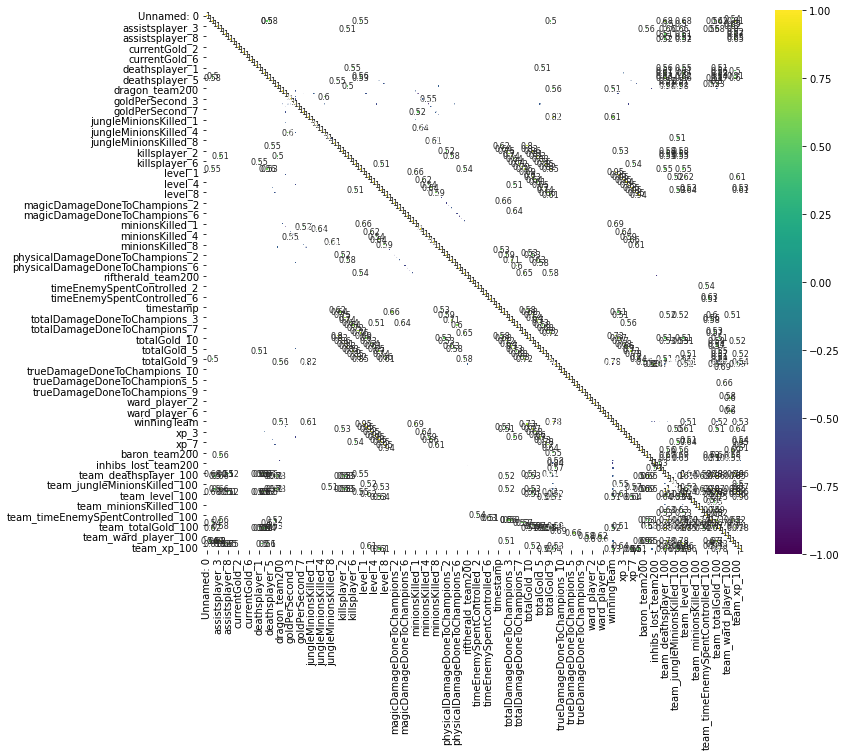

In [19]:
corr = df.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [34]:
#let's split our data using my train_validate_test function, and check our train, validate, and test shapes. Our target is tax_value.
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns train, validate, test sets and also another 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

target = 'winningTeam'
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)
train.shape, validate.shape, test.shape

((404, 209), (174, 209), (145, 209))

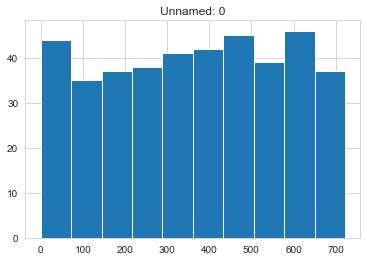

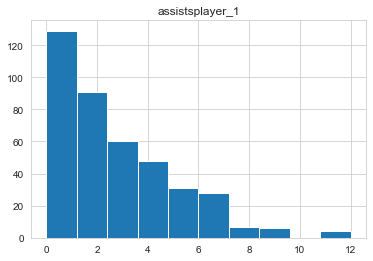

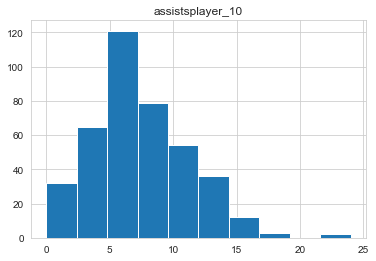

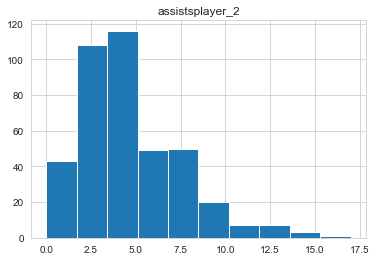

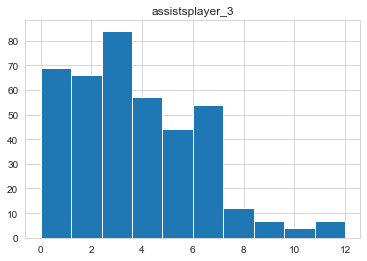

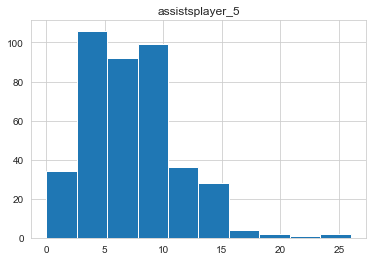

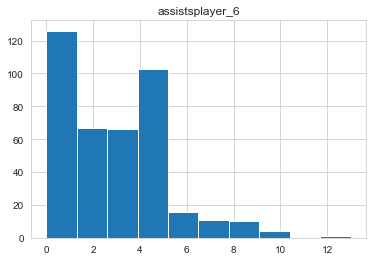

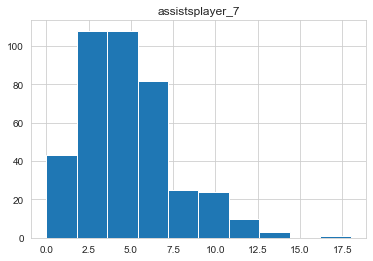

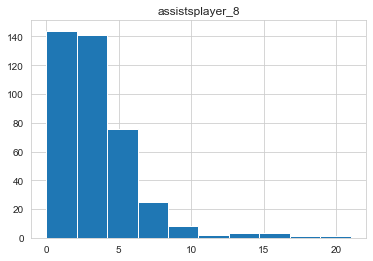

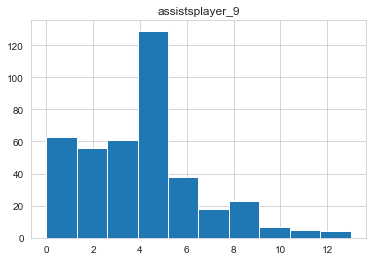

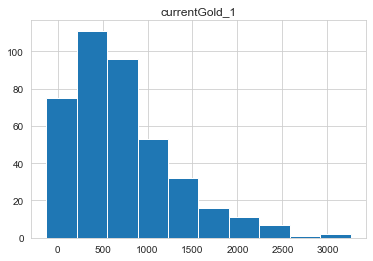

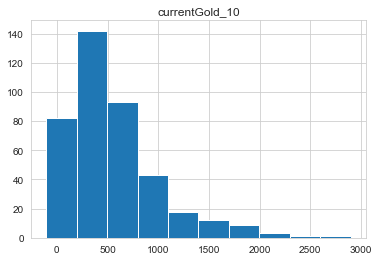

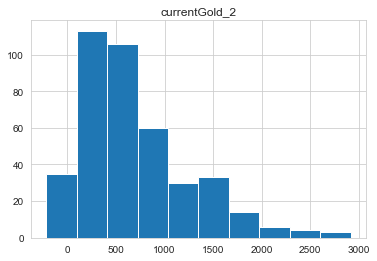

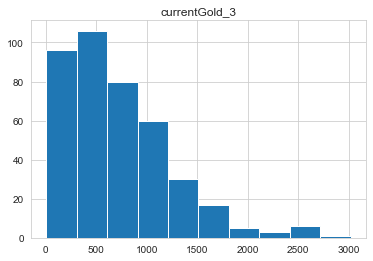

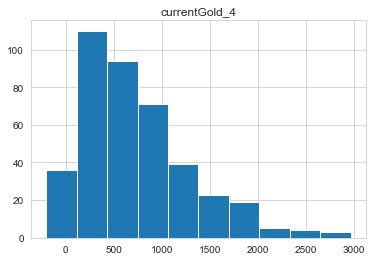

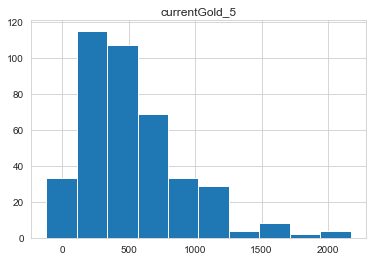

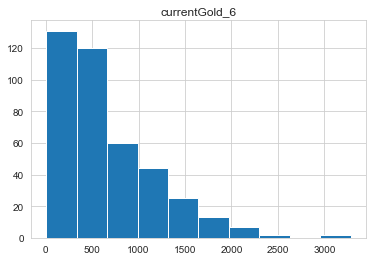

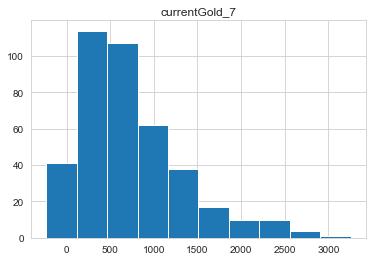

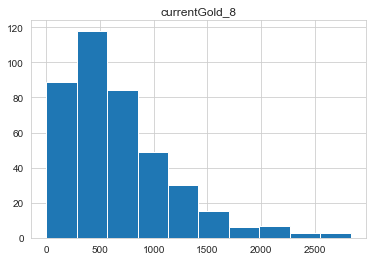

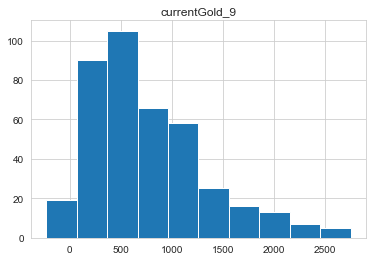

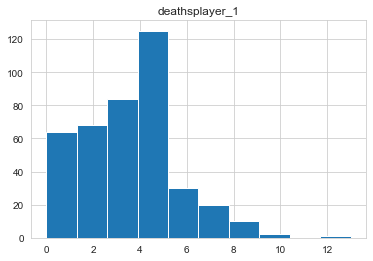

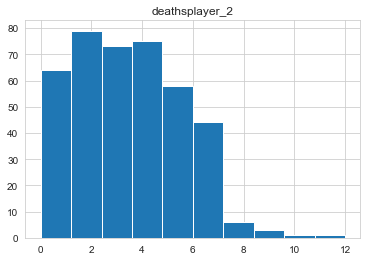

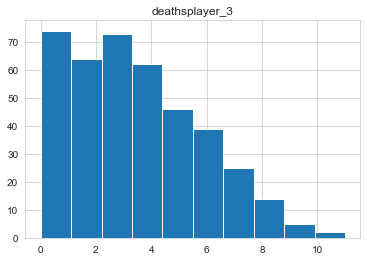

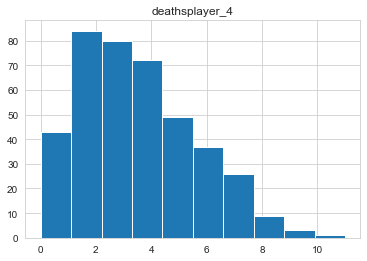

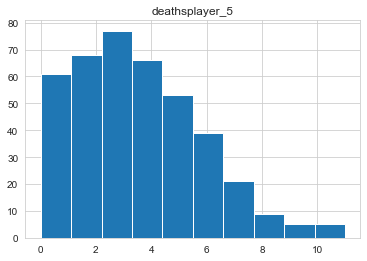

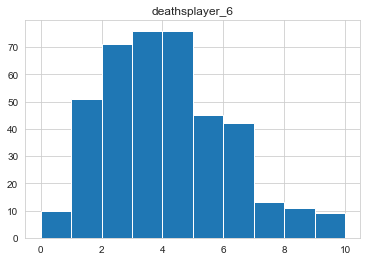

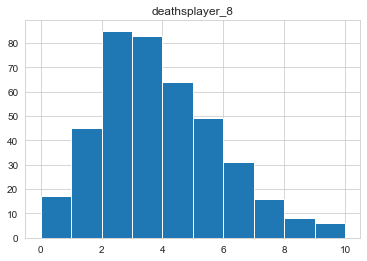

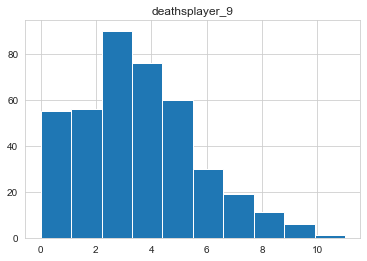

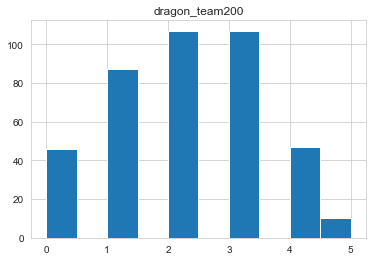

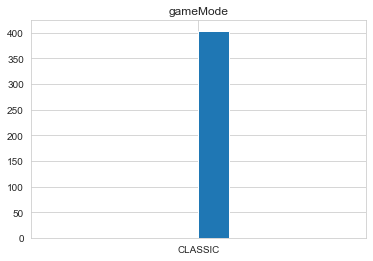

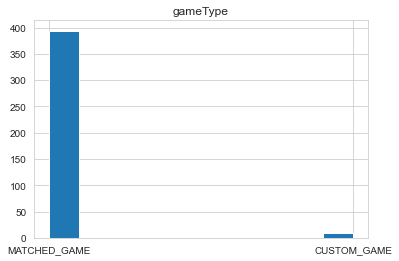

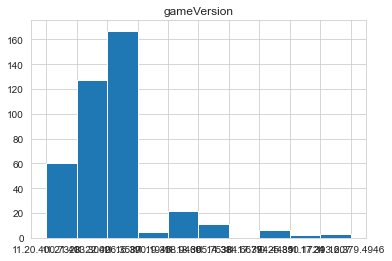

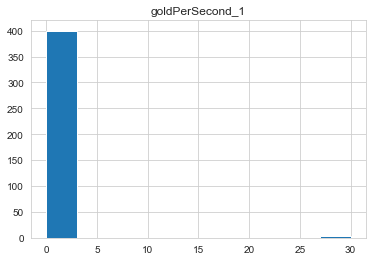

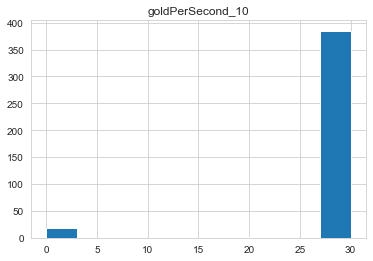

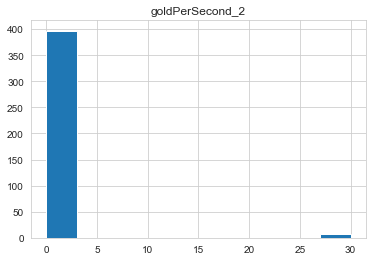

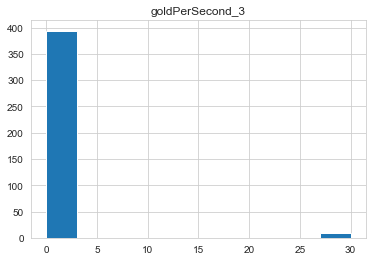

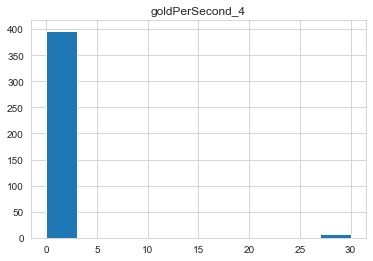

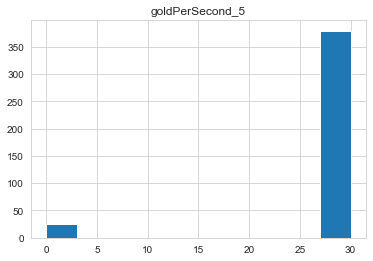

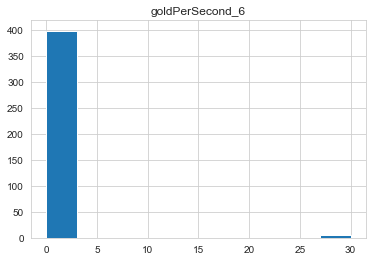

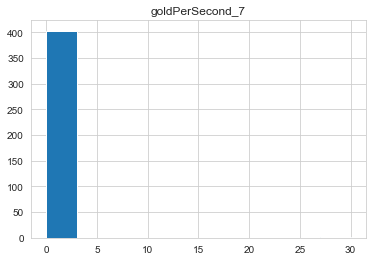

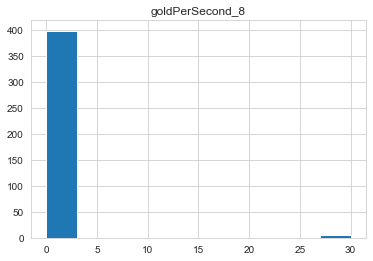

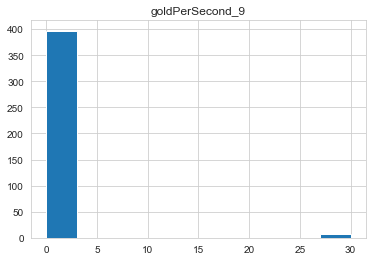

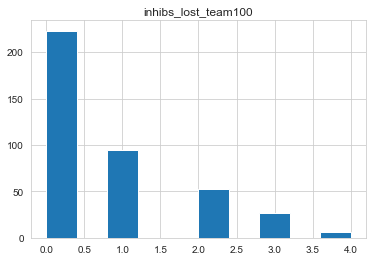

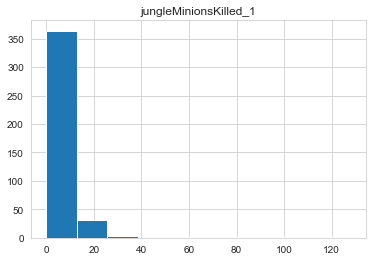

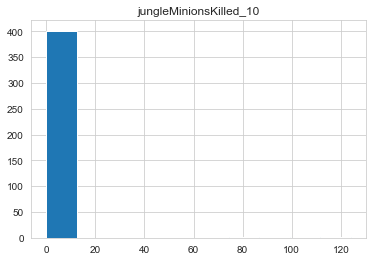

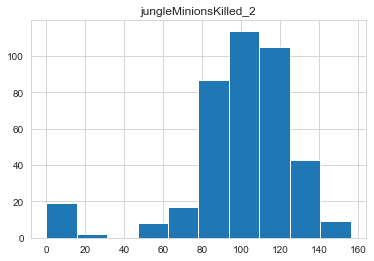

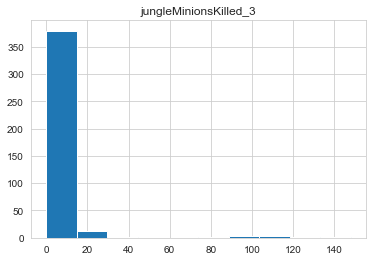

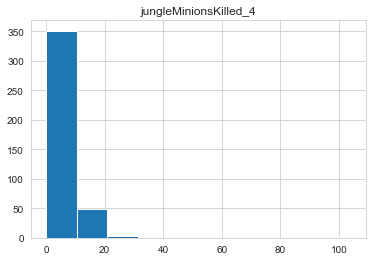

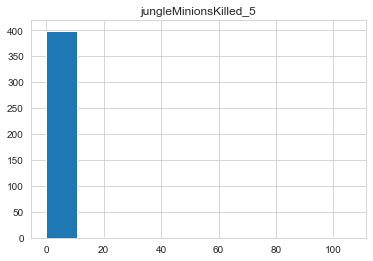

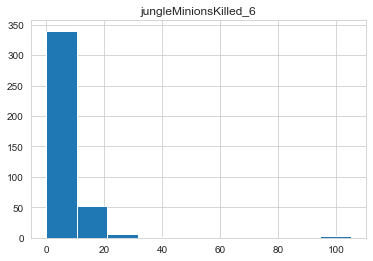

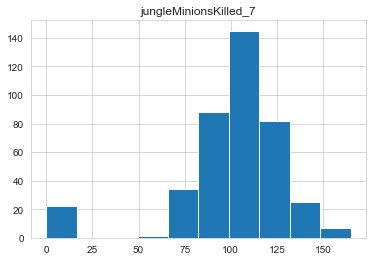

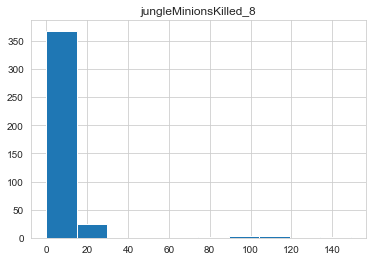

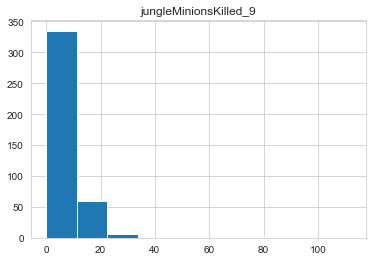

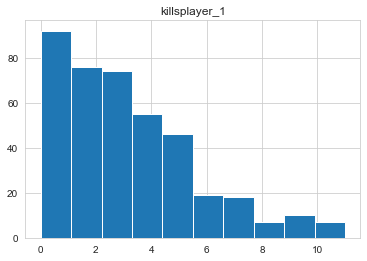

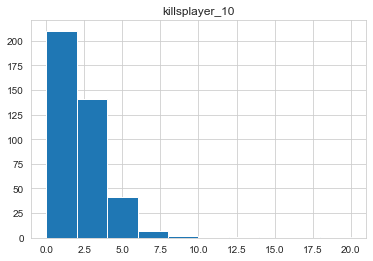

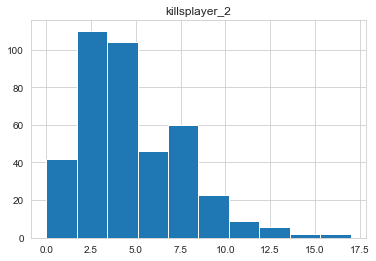

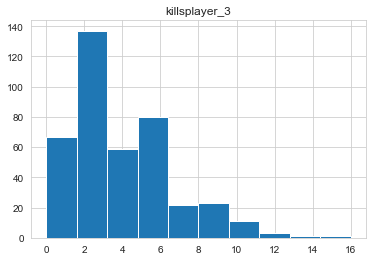

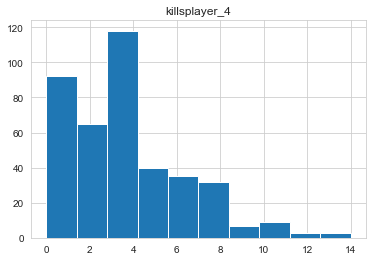

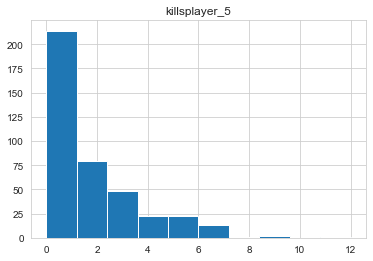

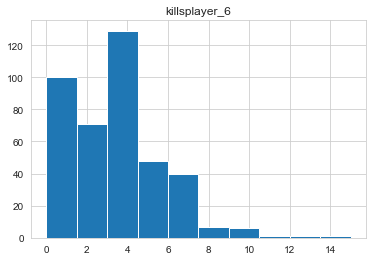

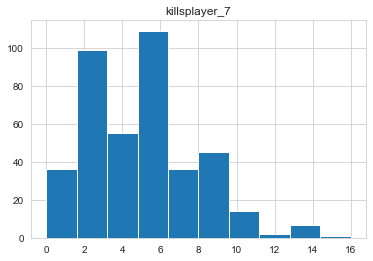

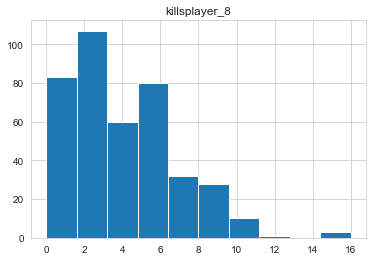

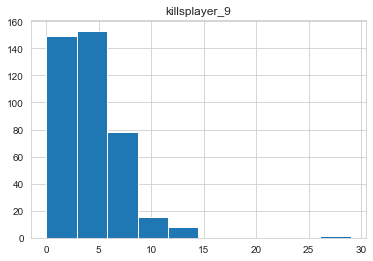

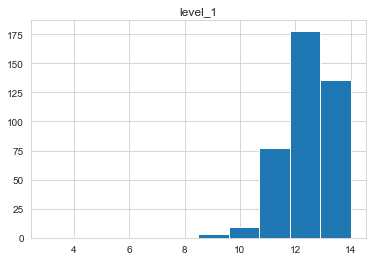

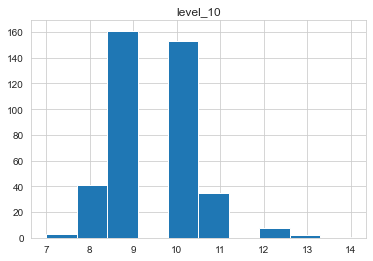

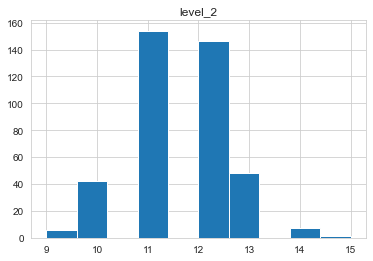

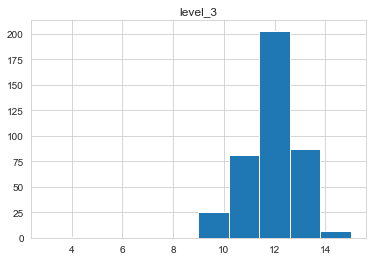

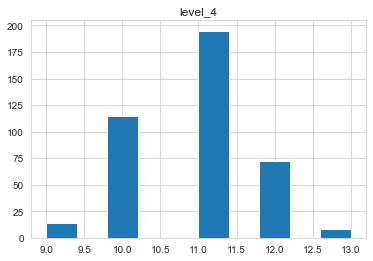

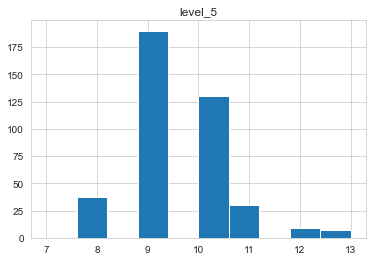

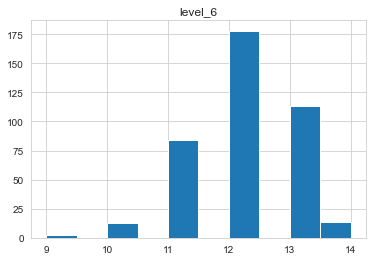

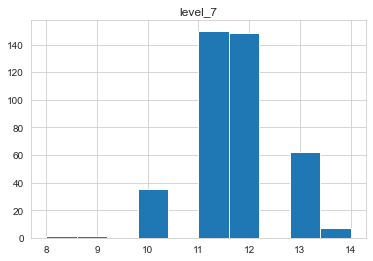

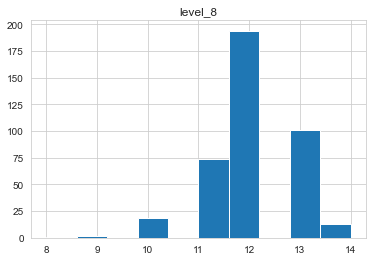

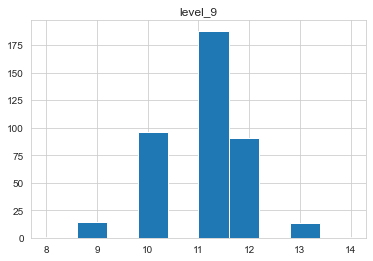

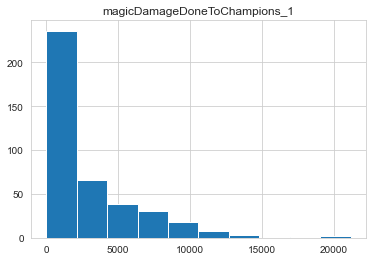

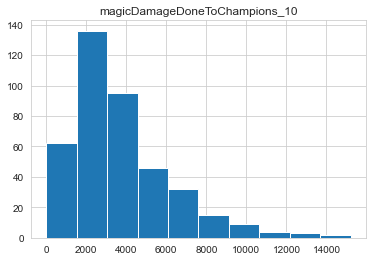

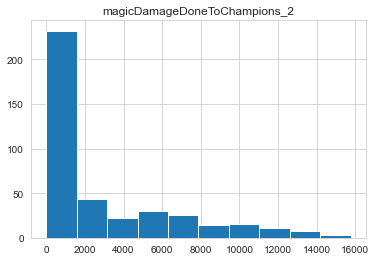

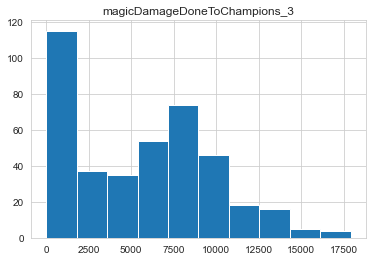

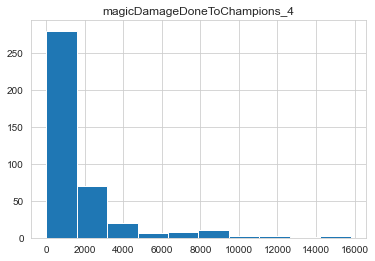

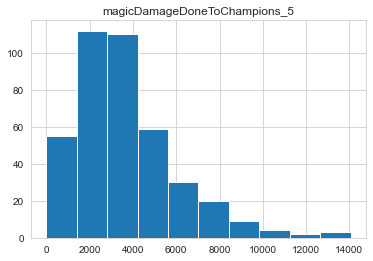

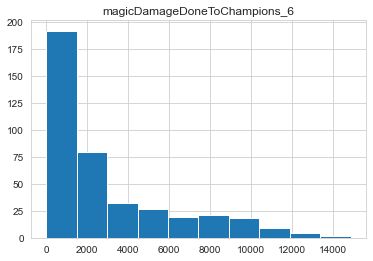

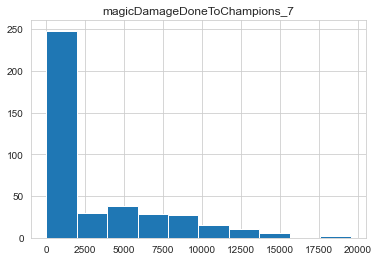

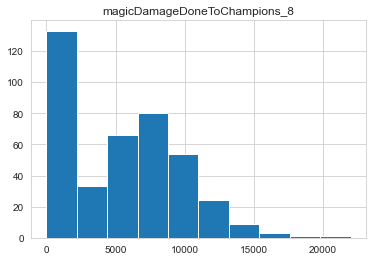

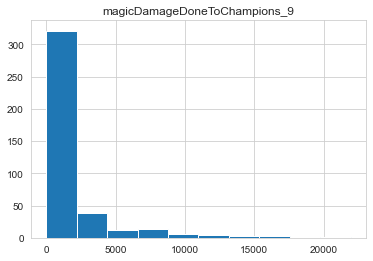

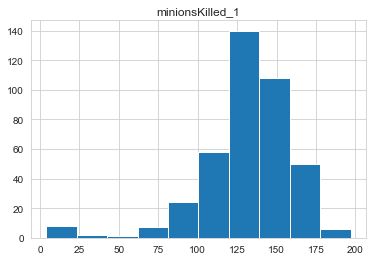

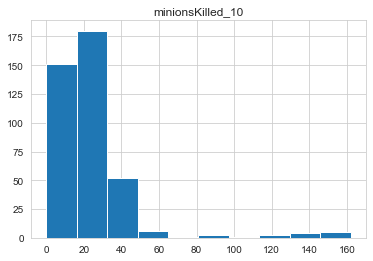

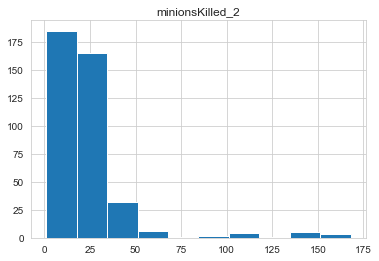

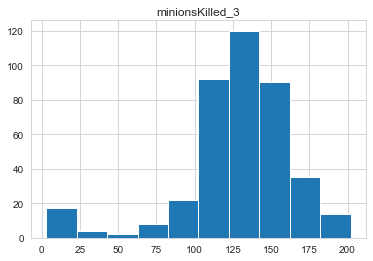

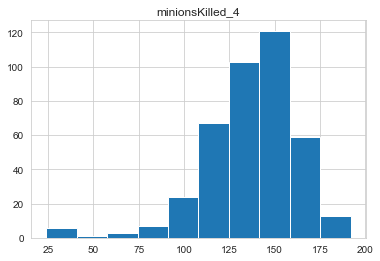

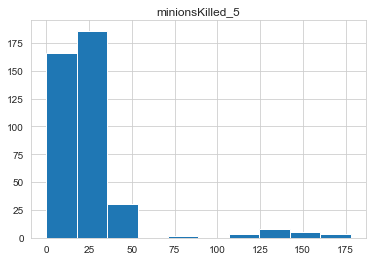

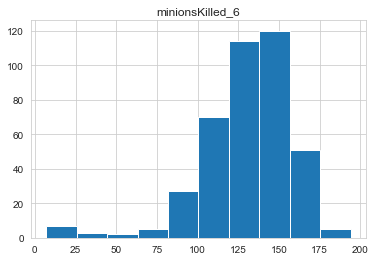

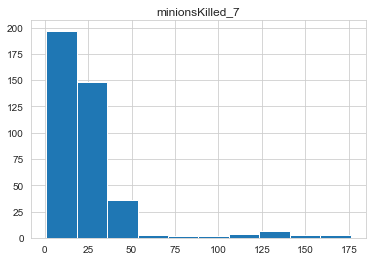

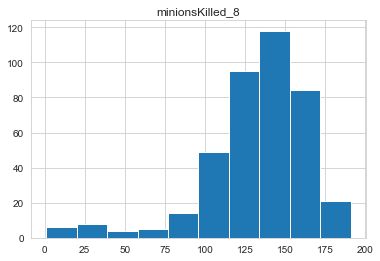

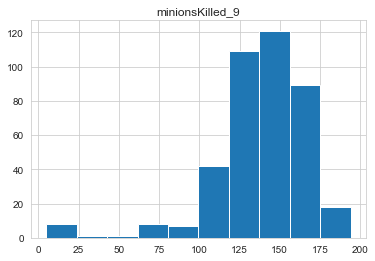

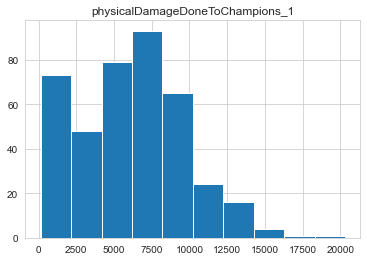

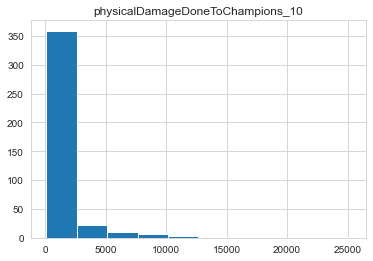

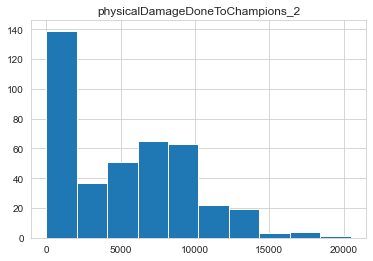

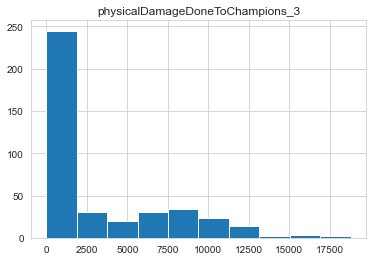

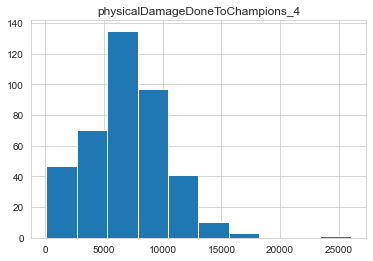

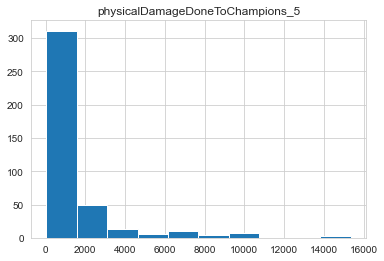

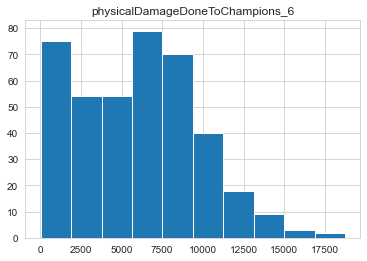

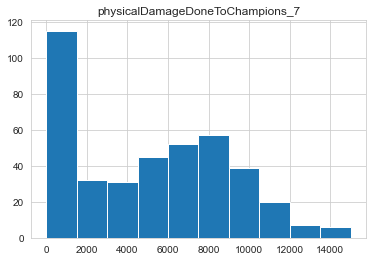

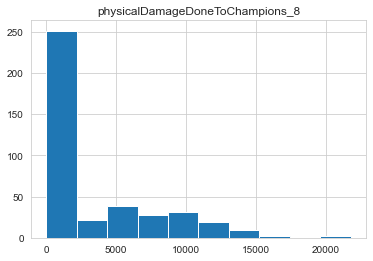

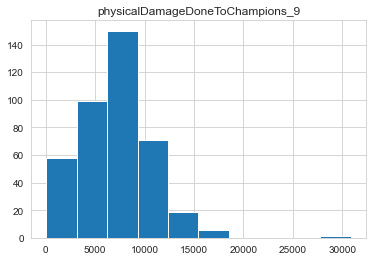

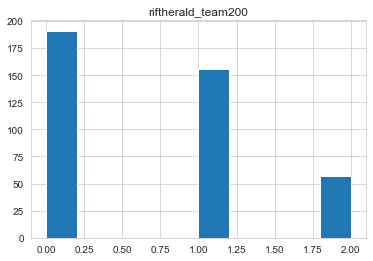

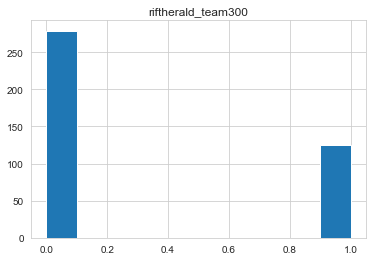

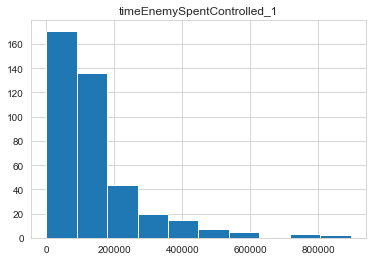

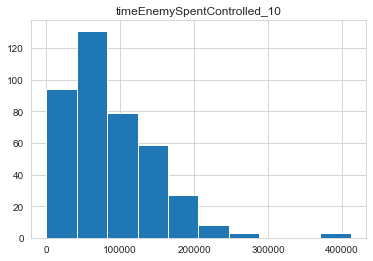

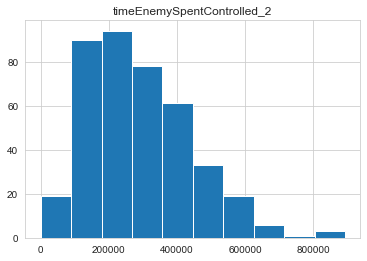

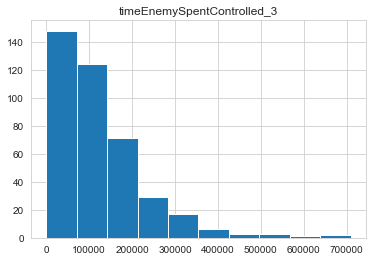

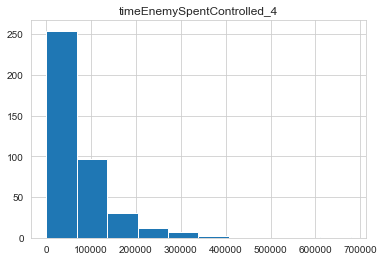

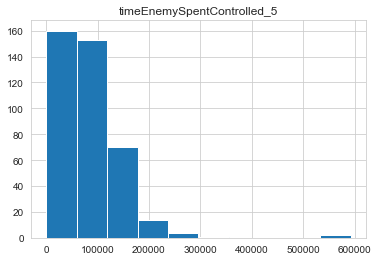

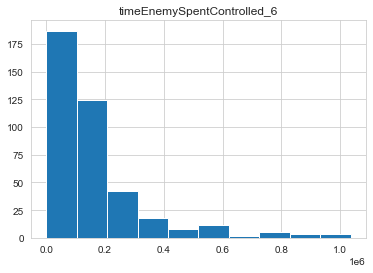

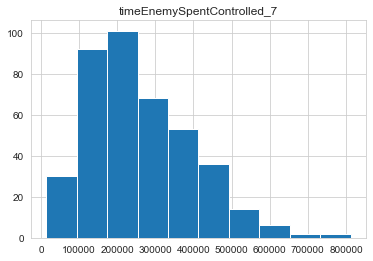

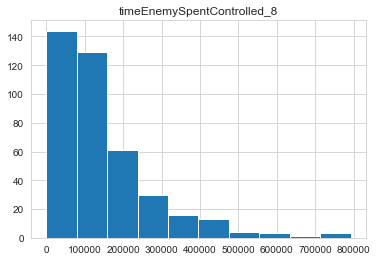

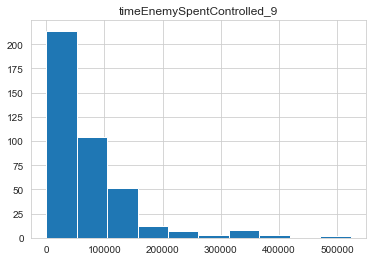

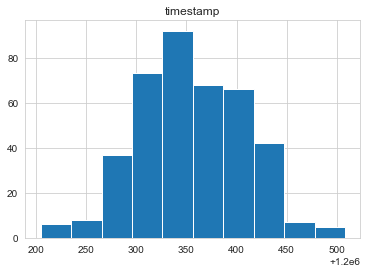

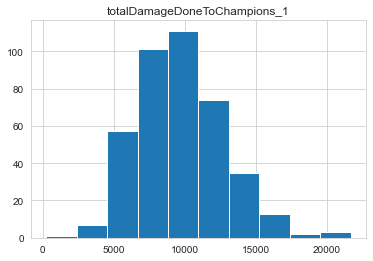

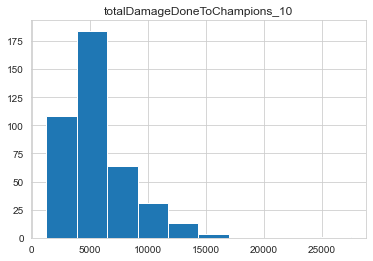

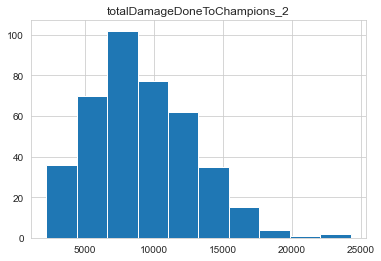

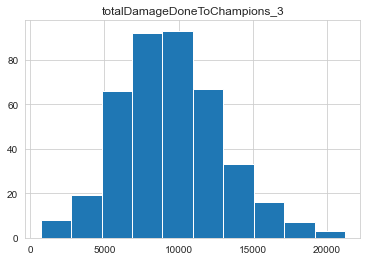

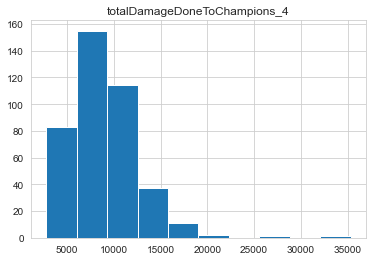

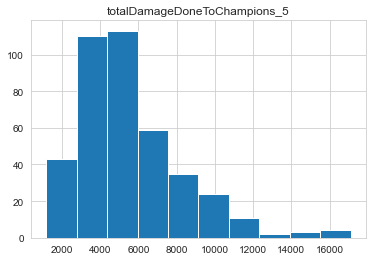

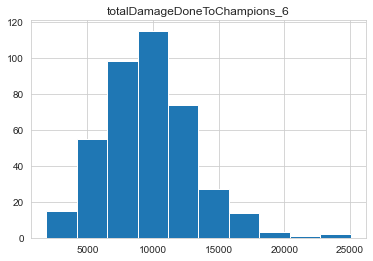

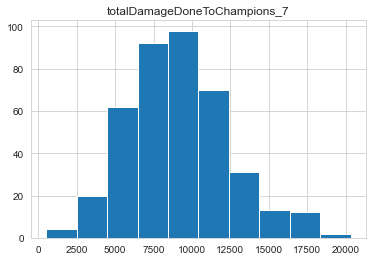

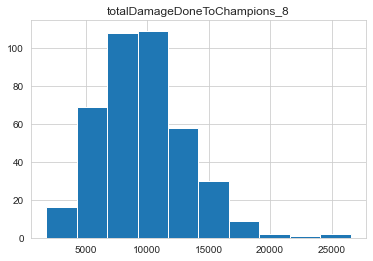

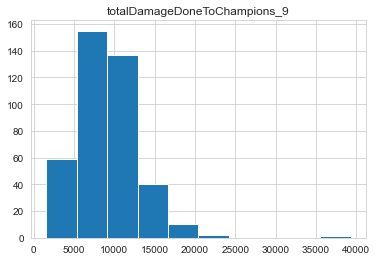

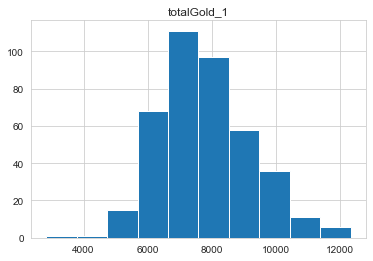

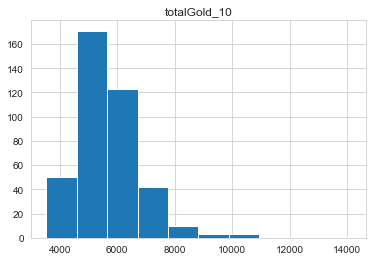

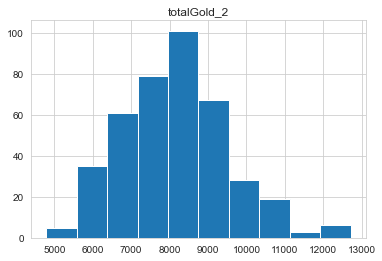

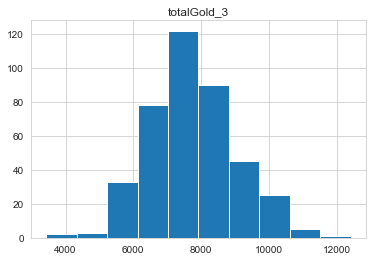

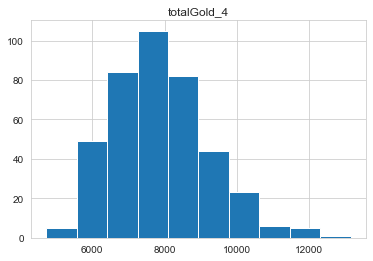

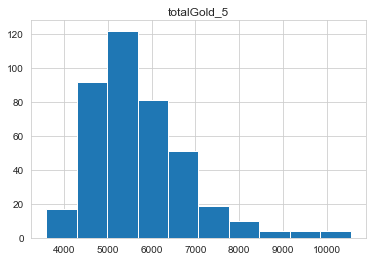

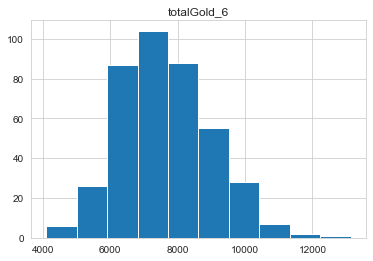

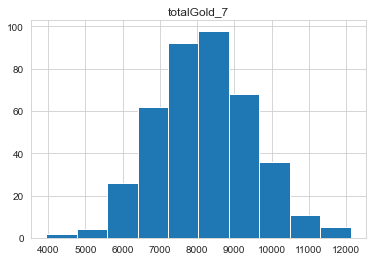

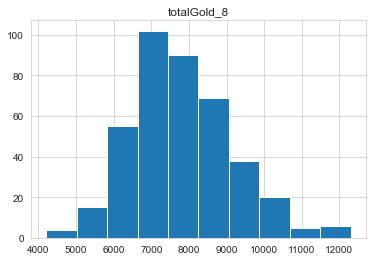

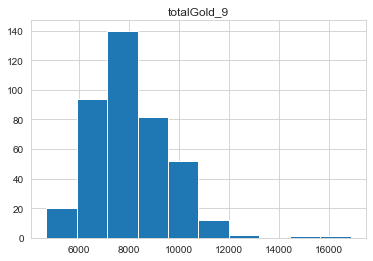

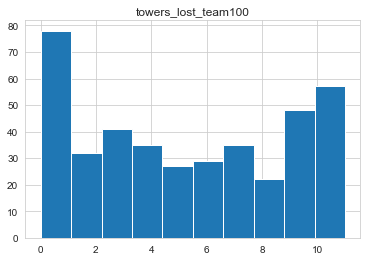

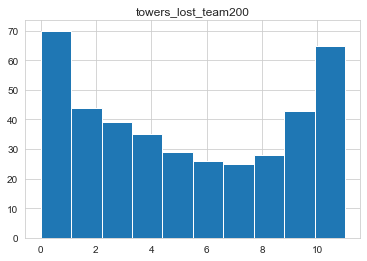

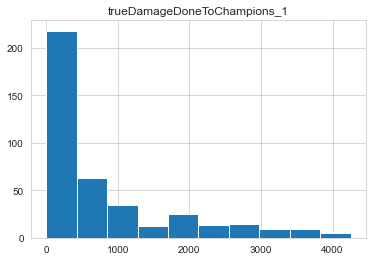

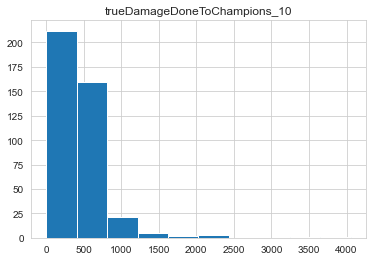

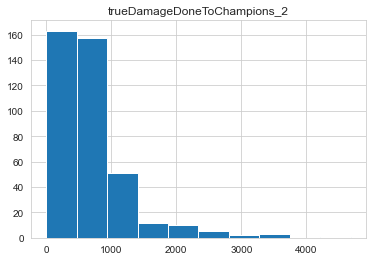

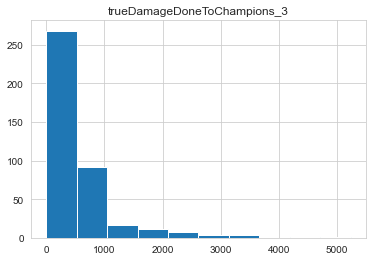

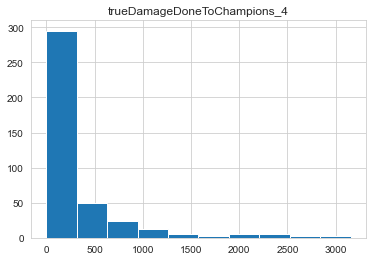

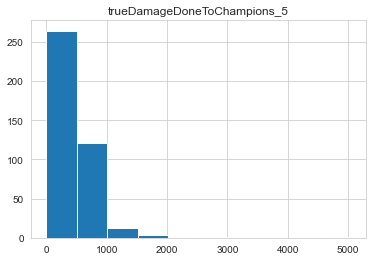

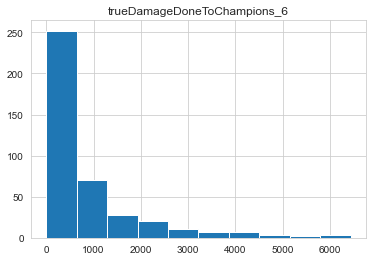

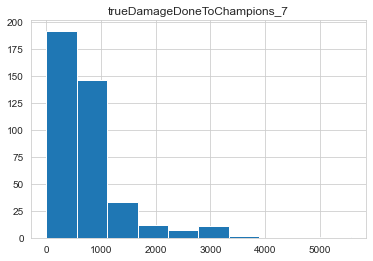

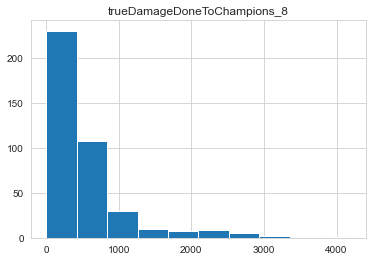

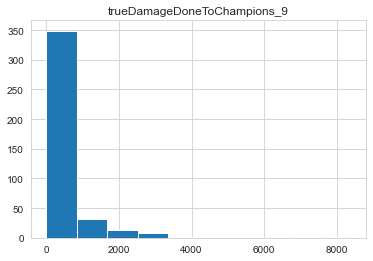

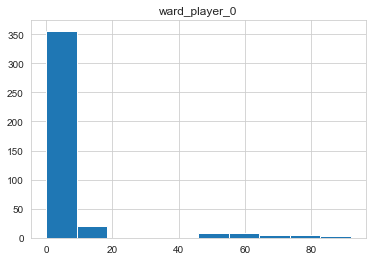

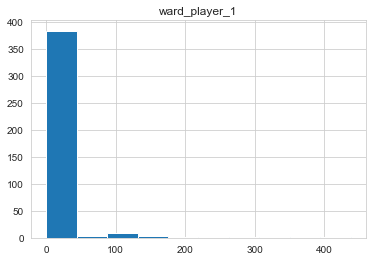

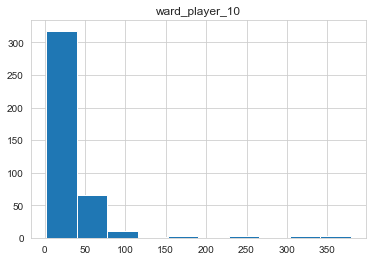

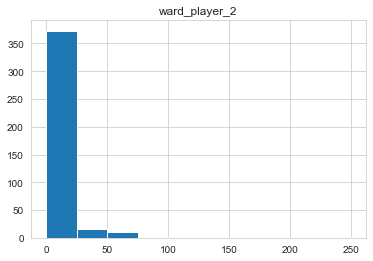

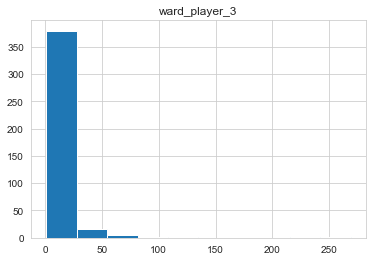

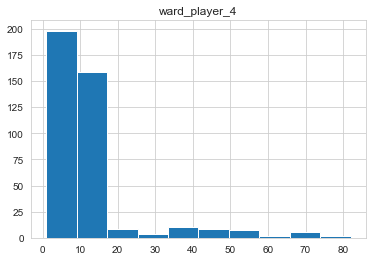

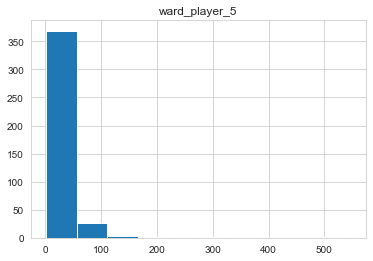

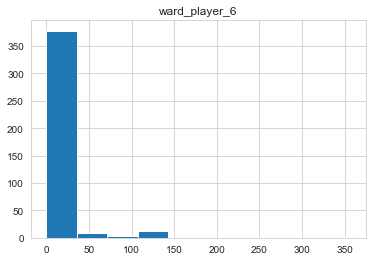

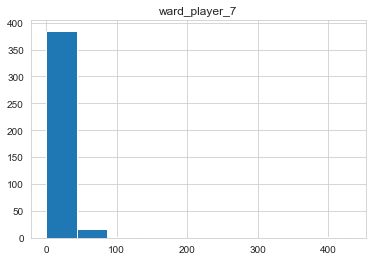

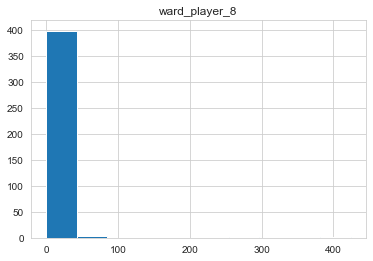

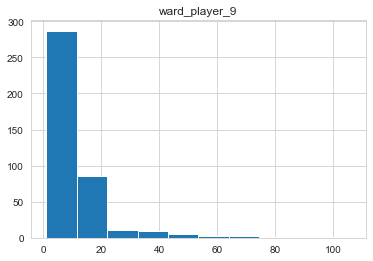

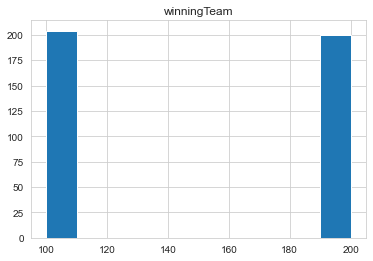

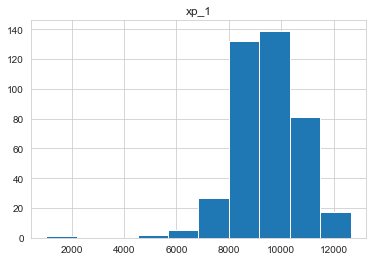

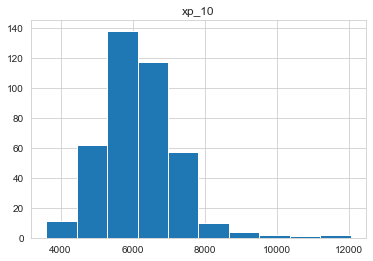

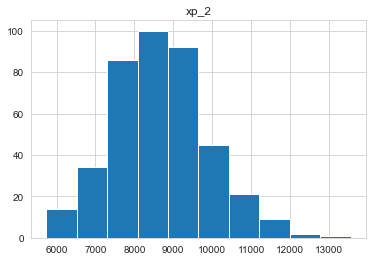

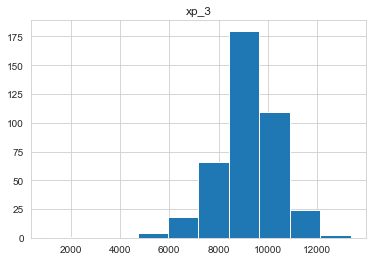

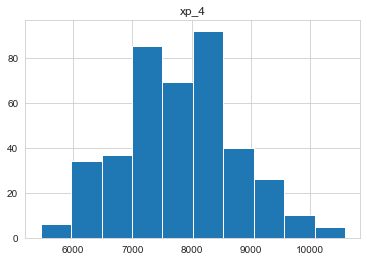

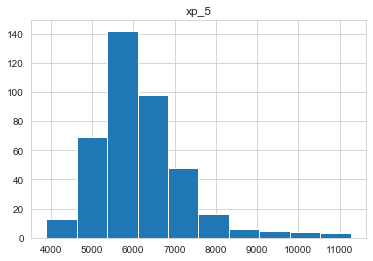

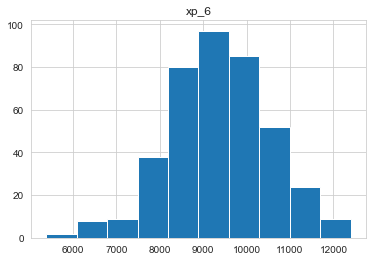

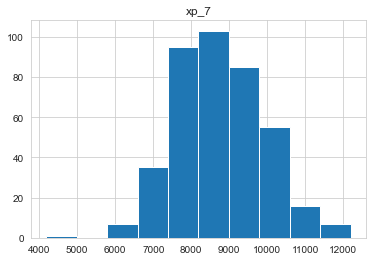

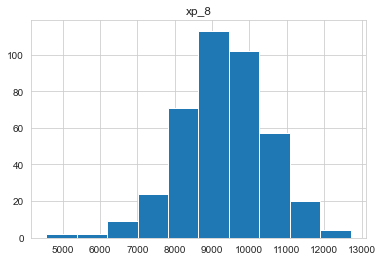

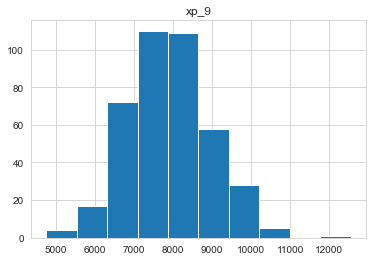

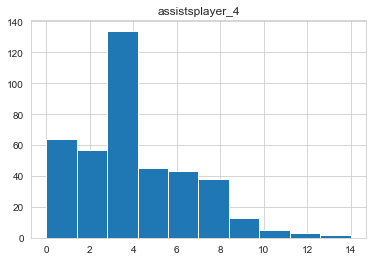

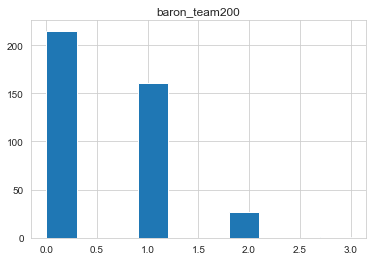

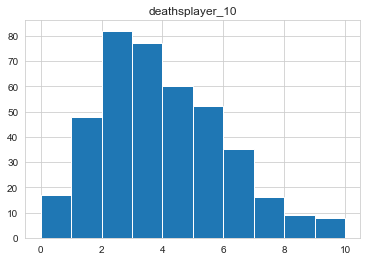

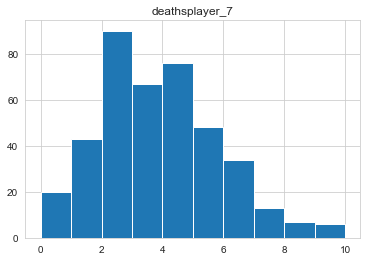

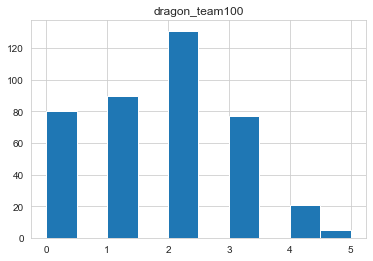

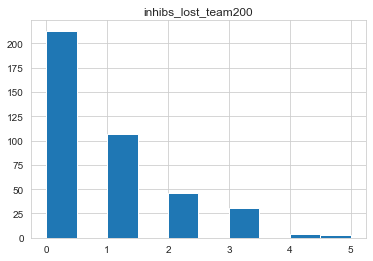

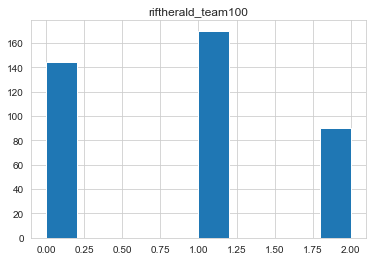

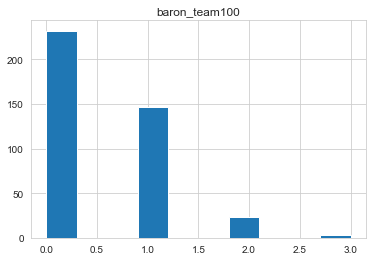

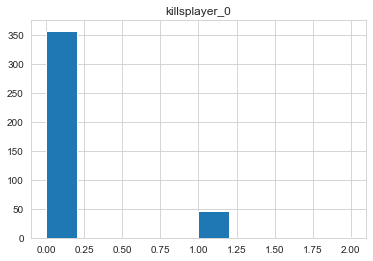

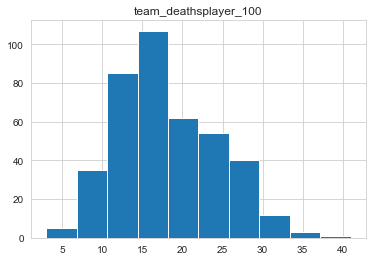

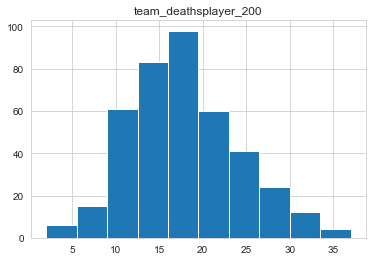

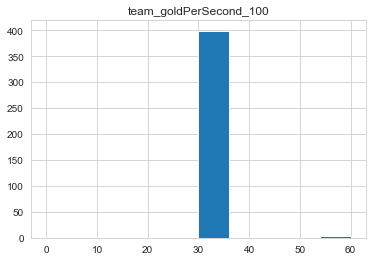

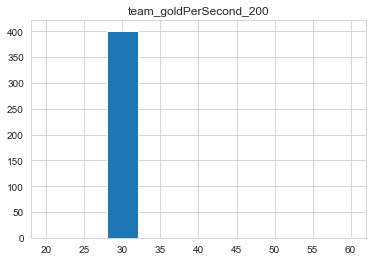

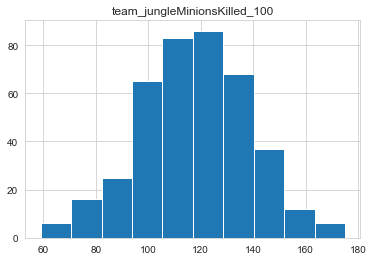

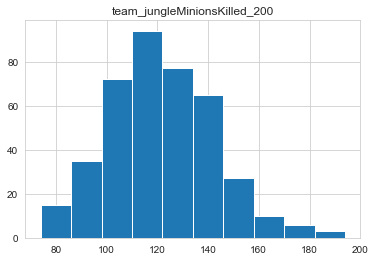

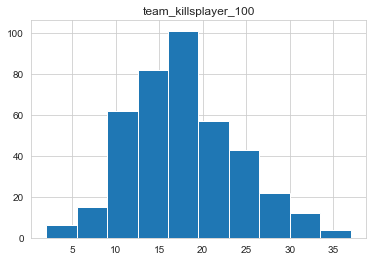

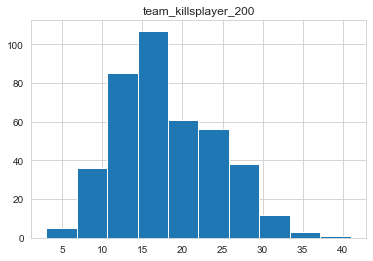

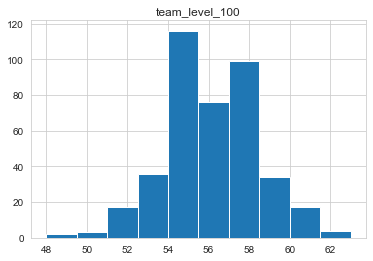

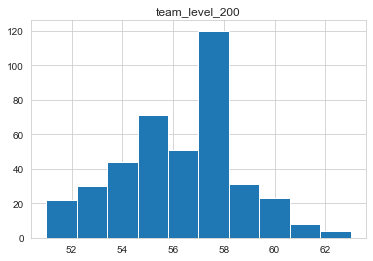

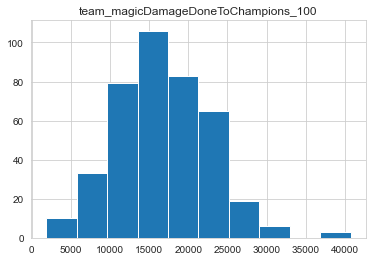

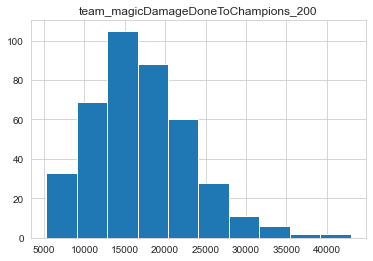

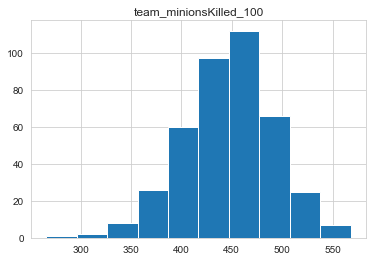

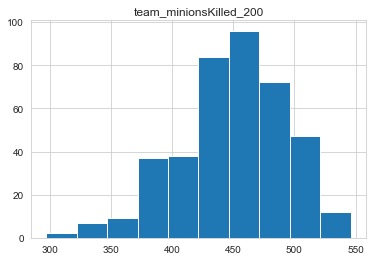

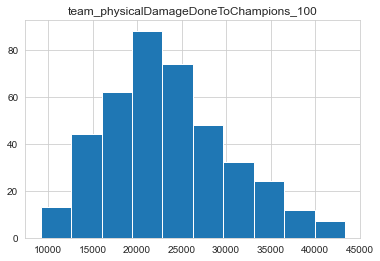

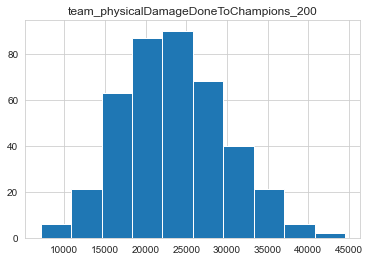

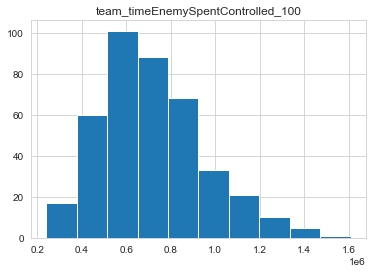

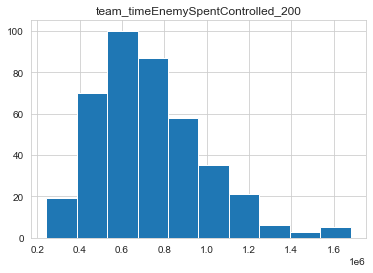

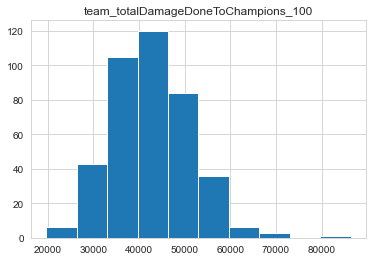

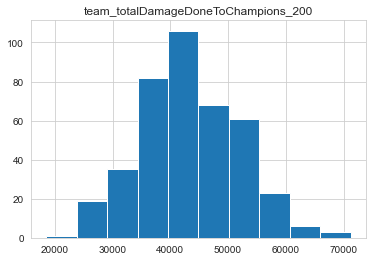

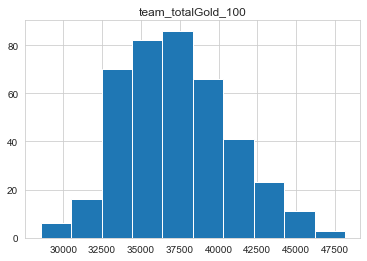

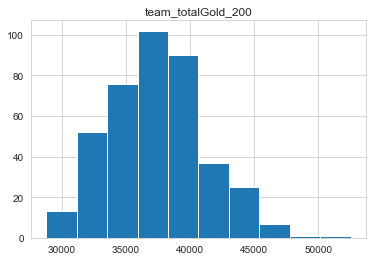

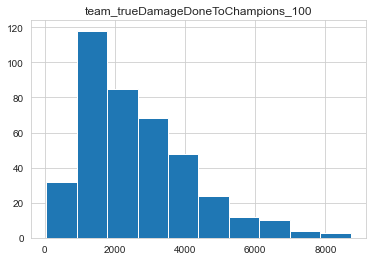

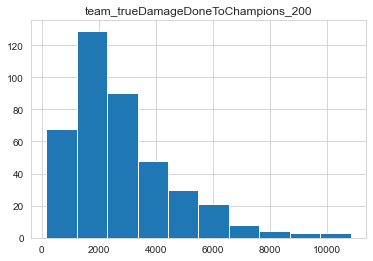

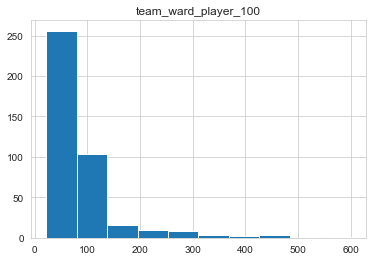

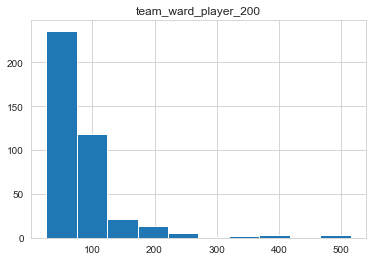

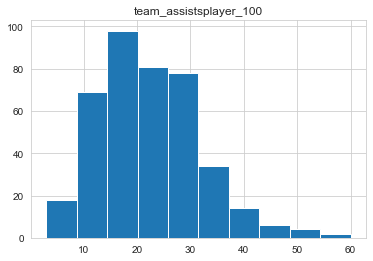

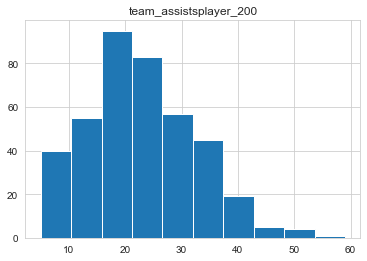

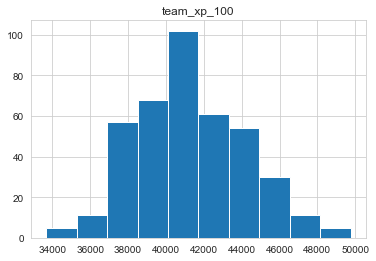

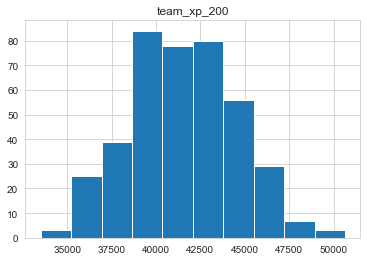

In [36]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [39]:
target = 'winningTeam'
explore_multivariate(train, target, cat_vars, quant_vars)

NameError: name 'cat_vars' is not defined

In [13]:
### explore functions
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

    
def plot_pairplot(train, cols, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    sns.pairplot(train[cols], corner=True)
    plt.show()
    
    
    
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    train.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()
    
def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks, and turns off gridlines.
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    
    # distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, element='step', kde=True, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    
    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()
    
    
def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()    

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 6), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat) 

In [ ]:
#pairplots 
plot_variable_pairs(train, cols)

In [ ]:
# correlation
correlation_exploration(train, 'beds', 'tax_value')

In [45]:
# hypothesis testing

null_hypothesis = "team_physicalDamageDoneToChampions_100 < 20,000 has no difference in the outcome of the game"
alternative_hypothesis = "team_physicalDamageDoneToChampions_100 > 20,000 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_damage = train[train.team_physicalDamageDoneToChampions_100 > 20_000]
little_damage = train[train.team_physicalDamageDoneToChampions_100 <= 20_000]
t, p = stats.ttest_ind(big_damage.winningTeam, little_damage.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

1.2654739779578563e-06
Reject null hypothesis that: team_physicalDamageDoneToChampions_100 < 20,000 has no difference in the outcome of the game
There is evidence to suggest: team_physicalDamageDoneToChampions_100 > 20,000 has a difference in the outcome of the game


In [47]:
# hypothesis testing

null_hypothesis = "team_level_100 < 55 has no difference in the outcome of the game"
alternative_hypothesis = "team_level_100 < 55 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_level = train[train.team_level_100 > 55]
little_level = train[train.team_level_100 <= 55]
t, p = stats.ttest_ind(big_level.winningTeam, little_level.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

2.1704173338280766e-21
Reject null hypothesis that: team_level_100 < 55 has no difference in the outcome of the game
There is evidence to suggest: team_level_100 < 55 has a difference in the outcome of the game


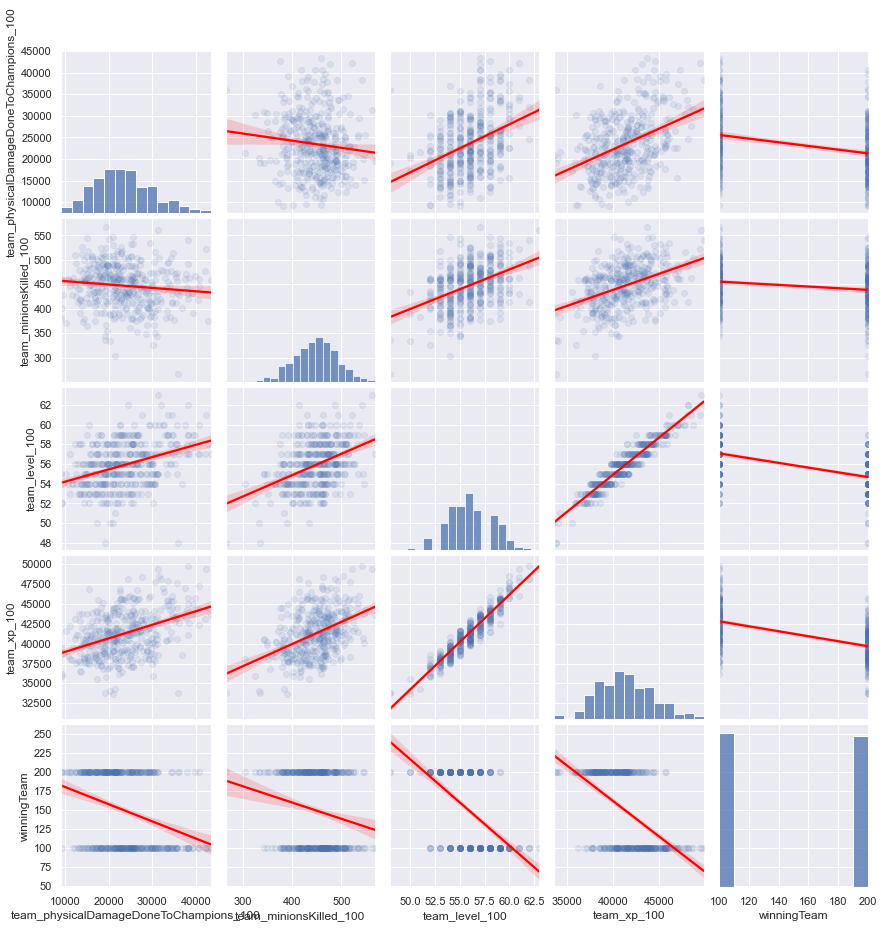

In [62]:

def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()
cols = ['team_physicalDamageDoneToChampions_100', 'team_minionsKilled_100','team_level_100', 'team_xp_100','winningTeam']
#pairplots 
plot_variable_pairs(train, cols)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.031352376750207196. There is 0.031% chance that we see these results by chance.
r = -0.11


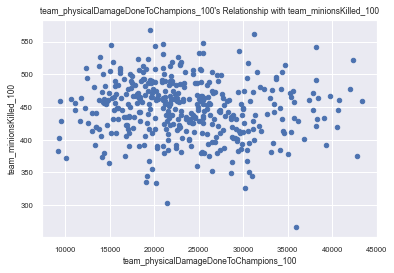

In [67]:
correlation_exploration(train, 'team_physicalDamageDoneToChampions_100', 'team_minionsKilled_100')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 1.3523691479091642e-22. There is 0.0% chance that we see these results by chance.
r = 0.46


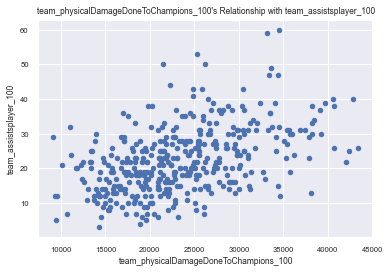

In [70]:
correlation_exploration(train, 'team_physicalDamageDoneToChampions_100', 'team_assistsplayer_100')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.0008000116360557649. There is 0.001% chance that we see these results by chance.
r = 0.17


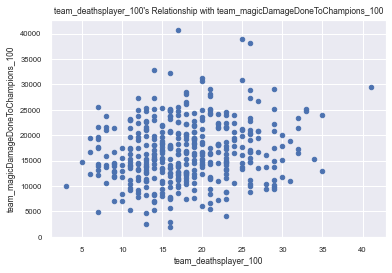

In [72]:
correlation_exploration(train, 'team_deathsplayer_100', 'team_magicDamageDoneToChampions_100')

In [ ]:
# univariate study
univariate_study = ['R_avg_SUB_ATT','R_total_rounds_fought','R_Height_cms','R_Reach_cms','R_avg_CTRL_time(seconds)','R_avg_SIG_STR_pct']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

In [ ]:
### compares spells
spellColors = ["#6E2C00","#1A5276","#9A7D0A","#F1C40F","#3498DB","#58D68D","#E74C3C","#F39C12","#8E44AD"]
sns.barplot(x=spellsTotals.index,y=spellsTotals['count'],palette=spellColors)

NameError: name 'teams' is not defined

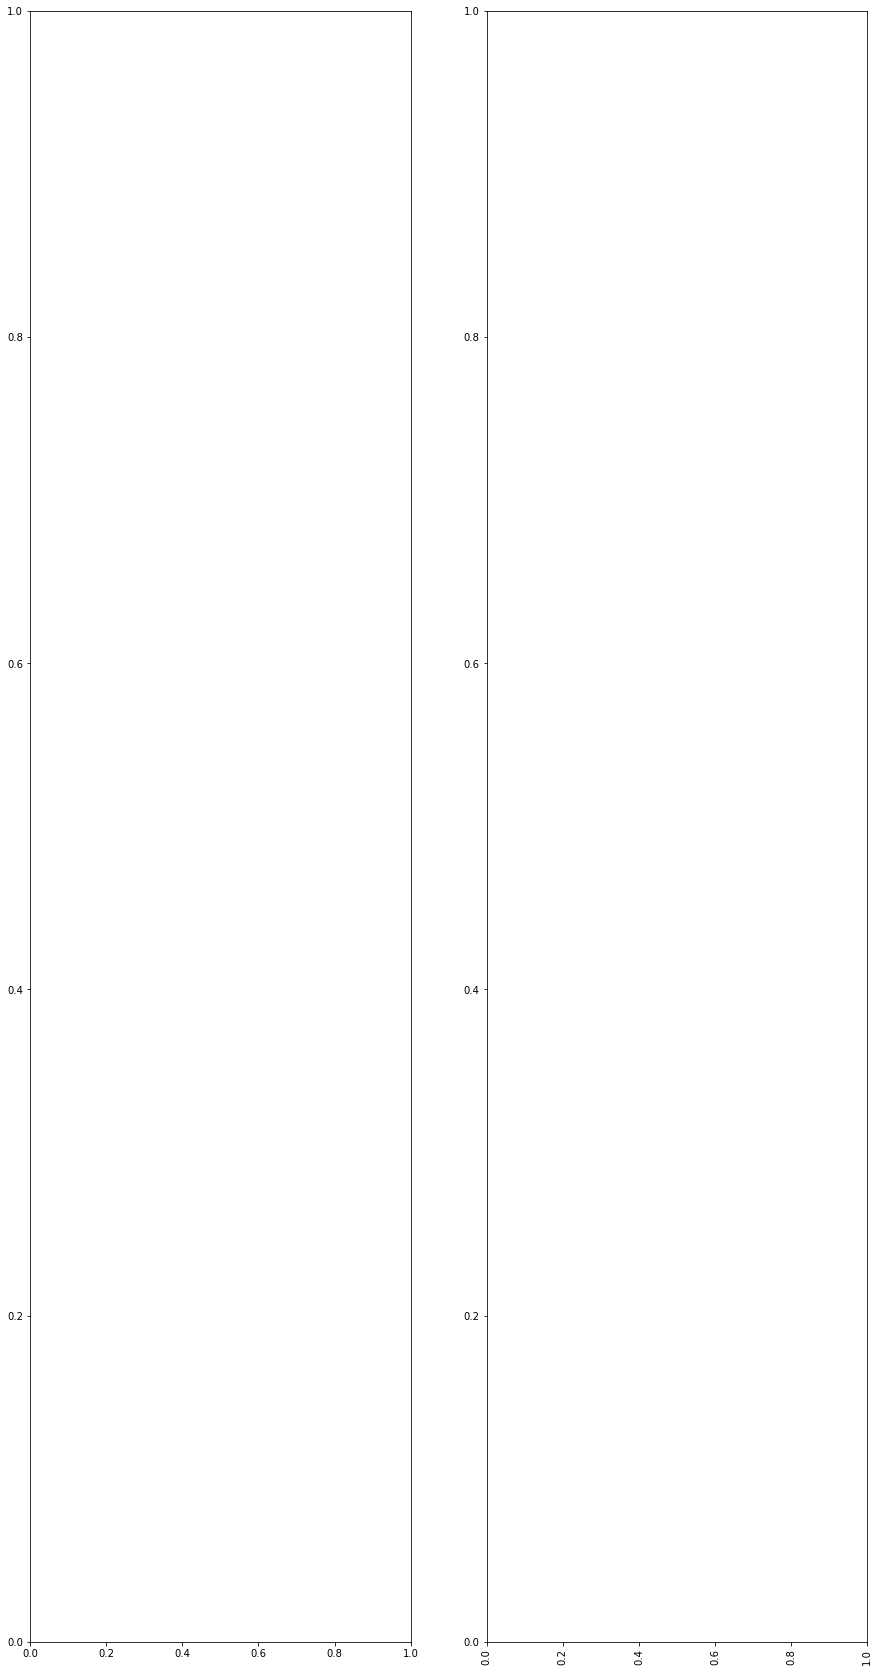

In [20]:
# for champions picks and bans
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=teams, data=data, ax=ax1)
sns.countplot(y=sortedBans, data=data, ax=ax2)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')

In [ ]:
# barplot for who chose to be tanks, assassin, mage, etc
sns.barplot(x=tagsTotals.index,y=tagsTotals['count'])

NameError: name 'firstSort' is not defined

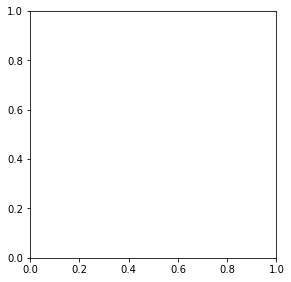

In [21]:
# barplots for the following ideas

plotColors = ['#3498DB','#E74C3C','#BDC3C7']
firstLabels = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
nrows, ncols = 2,3
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstSort.index,y=firstSort[firstSort.columns[i-1]],palette=plotColors)
    ax.set_ylabel('Count')
    ax.yaxis.set_ticklabels([])
    ax.set_title(firstLabels[i-1])

In [ ]:
# pie chart for the distribution of winner for blue and red

sides = ['Blue', 'Red']
def count_win_on_side(row):
    if (row['winner'] == row['blue']):
        return pd.Series([1, 0], sides)
    else:
        return pd.Series([0, 1], sides)

data_sides = df.apply(lambda row: count_win_on_side(row), axis=1).mean()

fig, ax = plt.subplots(figsize=(20, 7), subplot_kw=dict(aspect="equal"))

colors = ['#51acc6', '#ea96a3']
plt.pie(data_sides, colors=colors, labels=sides)

ax.set_title('Distribution of the winning percentage by side', pad=20)
plt.axis('equal')
plt.show()

KeyError: 'gamelength'

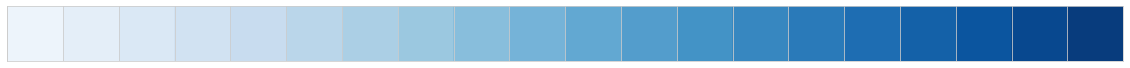

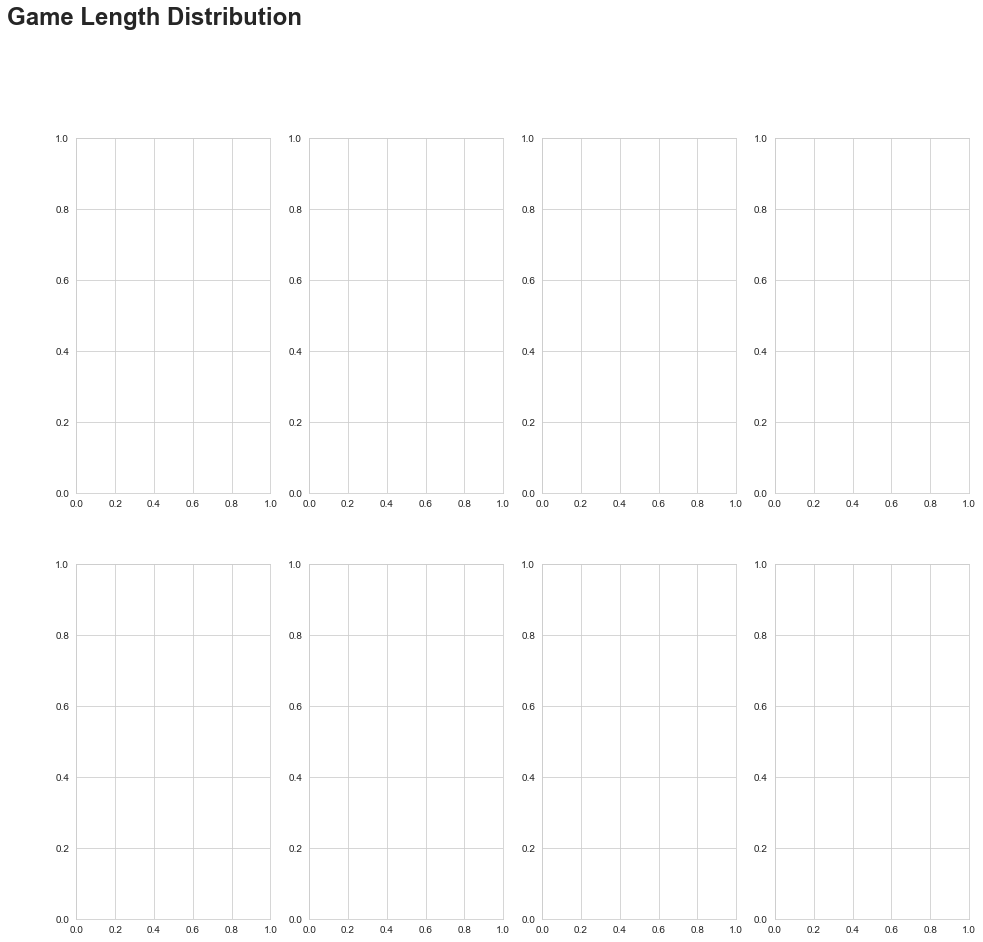

In [22]:
# Setstyle options
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('Blues', 20))
colors = sns.color_palette('Blues', 20)

# Create Figure
fig, ax = plt.subplots(2,4, figsize=(16,14))
fig.suptitle('Game Length Distribution', x=0.065, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75])
ptiles_gl = np.percentile(df['gamelength'], percentiles)

# Create Subplots

# 1 Box and Whisker
p1 = plt.subplot2grid((2,4), (0,0), colspan=1)
sns.boxplot(y=df['gamelength'], color=colors[14])
# Swarm plot adds no value here, ignore below
# sns.swarmplot(y=df['gamelength'], color=colors[2])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')

# 2 ECDF Plot
p2 = plt.subplot2grid((2,4), (0,1), colspan=3)
x = np.sort(df['gamelength'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=colors[16])
plt.plot(ptiles_gl, percentiles/100, marker='D', color='red', linestyle='none')

# 2 ECDF Formatting (a lot)
yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 85, 5), fontsize=14)
plt.xlabel('Minutes', fontsize=18, fontweight = 'bold')
plt.ylabel('ECDF', fontsize=18, fontweight='bold')
plt.margins(0.02)

plt.annotate('25% of games were 32 minutes or less', xy=(32, .25), xytext=(37, .23), fontsize=18, 
             arrowprops=dict(facecolor='black'))
plt.annotate('50% of games were 37 minutes or less', xy=(37, .5), xytext=(42, .48), 
             fontsize=18, arrowprops=dict(facecolor='black'))
plt.annotate('75% of games were 42 minutes or less', xy=(42, .75), xytext=(47, .73), fontsize=18, 
             arrowprops=dict(facecolor='black'))

# 3 Histogram Count
p3 = plt.subplot2grid((2,4), (1,0), colspan=2)
plt.hist(x='gamelength', bins=80, data=df, color=colors[14])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Minutes', fontweight = 'bold', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18, fontweight='bold')

# 3 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df['gamelength']) / len(df['gamelength'])
p3 = plt.twinx()
plt.hist(x='gamelength', bins=80, weights= weights, data=df, color=colors[14])
yvals = p3.get_yticks()
p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p3.grid(b=False)

# 4 Distribution Plot across Years
p4 = plt.subplot2grid((2,4), (1,2), colspan=2)
sns.distplot((df['gamelength'][df['Year']==2014]), hist=False, color='r', label='2014')
sns.distplot((df['gamelength'][df['Year']==2015]), hist=False, color='grey', label='2015')
sns.distplot((df['gamelength'][df['Year']==2016]), hist=False, color='y', label='2016')
sns.distplot((df['gamelength'][df['Year']==2017]), hist=False, color='g', label='2017')
sns.distplot((df['gamelength']), hist=False, color='b', label='All Years')

# Formatting
yvals = p4.get_yticks()
p4.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Percent of All Games\n', fontsize=18, fontweight='bold')
plt.xlabel('Minutes', fontsize = 18, fontweight = 'bold')

# Show everything
plt.tight_layout()
plt.show()

In [ ]:
lst_gameID = pd.unique(df['gameID'])
games = 4
lst_games = list(np.arange(0,games,1))

fig, ax = plt.subplots(figsize=(14,16))
fig.suptitle('Cumulative Kills by Game', fontsize= 24, fontweight='bold', x=0.04, y=1.02, horizontalalignment='left')
fig.subplots_adjust(top=0.85)

for g, c in zip(lst_gameID, lst_games):
    gameID = lst_gameID[c]
    
    ax = plt.subplot(games,1,c+1)

    df_kills = melt_kills[(melt_kills['gameID']==gameID) & melt_kills['minute_bin'].notnull()]

    plt.title('GameID = ' + gameID, fontsize= 14, loc='left')
    sns.regplot(x="value", y="action_count", y_jitter=True, data=df_kills[df_kills['win']==True], color=color_win, 
                label='winning team')
    sns.regplot(x="value", y="action_count", y_jitter=True, data=df_kills[df_kills['win']==False], color=color_lose, 
                label='losing team')
    plt.yticks(np.arange(0, 25, 2))
    plt.xticks(np.arange(0, 45, 1))
    plt.ylabel('Cumulative Kills')
    plt.xlabel('Minute')

    ax.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
df_kills = melt_kills[melt_kills['minute_bin'].notnull()]

fig, ax = plt.subplots(figsize=(14,6))
fig.suptitle('Cumulative Kills by Team', fontsize= 24, fontweight='bold', x=0.04, y=1.04, horizontalalignment='left')
# fig.subplots_adjust(top=0.85)

ax = plt.subplot(111)

sns.regplot(x="value", y="action_count", y_jitter=True, data=df_kills[df_kills['win']==True], color=color_win, 
            label='winning team', scatter_kws={'s':2})
sns.regplot(x="value", y="action_count", y_jitter=True, data=df_kills[df_kills['win']==False], color=color_lose, 
            label='losing team', scatter_kws={'s':2})
plt.yticks(np.arange(0, max(df_kills['action_count'])+2, 2))
plt.xticks(np.arange(0, max(df_kills['value'])+2, 2))
plt.ylabel('Cumulative Kills')
plt.xlabel('Minute')

ax.legend(loc='best')

plt.tight_layout()
plt.show()


In [28]:
# firstInhibitor vs winner - stats
df[["team_physicalDamageDoneToChampions_100","winningTeam"]].groupby(["team_physicalDamageDoneToChampions_100"],as_index = False).mean().sort_values(by = "winningTeam",ascending = False)


,team_physicalDamageDoneToChampions_100,winningTeam
506,26791,200.0
296,21513,200.0
269,20999,200.0
268,20968,200.0
267,20959,200.0
...,...,...
371,23188,100.0
368,23050,100.0
367,23017,100.0
365,22992,100.0


In [ ]:
# firstBaron vs winner -stats
data_game[["firstBaron","winner"]].groupby(["firstBaron"],as_index = False).mean().sort_values(by = "winner",ascending = False)

In [ ]:
## Heatmap for after we decide features also with more than 50% correlation
sns.heatmap(data_game[["firstInhibitor","firstBaron","firstRiftHerald","winner"]].corr(),annot = True)
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

In [ ]:
## plt for game duration
def pltDuration(df):
    plt.figure(figsize = (15, 10))
    Duration_plot = plt.hist(df['gameDuration'], bins = 200)
    my_x_ticks = np.arange(0, 4200, 300)
    plt.xticks(my_x_ticks)
    plt.xlabel("gameDuration (s)", fontsize = 13)
    plt.ylabel('Frequency', fontsize = 13)
    plt.title('GameDuration Distribution', fontsize = 15)
    plt.show()
pltDuration(df)

In [ ]:
p_firstBlood = data[(data['firstBlood'] == 1) & (data['winner'] == 1)].count()/data[data['firstBlood'] == 1].count()
p_firstTower = data[(data['firstTower'] == 1) & (data['winner'] == 1)].count()/data[data['firstTower'] == 1].count()
p_firstInhibitor = data[(data['firstInhibitor'] == 1) & (data['winner'] == 1)].count()/data[data['firstInhibitor'] == 1].count()
p_firstBaron = data[(data['firstBaron'] == 1) & (data['winner'] == 1)].count()/data[data['firstBaron'] == 1].count()
p_firstDragon = data[(data['firstDragon'] == 1) & (data['winner'] == 1)].count()/data[data['firstDragon'] == 1].count()
p_firstRiftHerald = data[(data['firstRiftHerald'] == 1) & (data['winner'] == 1)].count()/data[data['firstRiftHerald'] == 1].count()

labels = ('firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald')
probabilities = [p_firstBlood['gameDuration'], p_firstTower['gameDuration'], p_firstInhibitor['gameDuration'], p_firstBaron['gameDuration']
                ,p_firstDragon['gameDuration'] ,p_firstRiftHerald['gameDuration']]
probabilities = [i * 100 for i in probabilities]
y_pos = np.arange(len(labels))
plt.figure(figsize=(25,15))
plt.bar(y_pos, probabilities, align='center', alpha=1)
plt.xticks(y_pos, labels, fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Probability(%)', fontsize = 30)
plt.title('Winning Probability when Team 1 got FirstXXX', fontsize = 40)
for a,b in zip(y_pos, probabilities):
    plt.text(a, b, '%.3f'%b+'%', ha='center', va= 'bottom',fontsize=30)
plt.show()

ValueError: could not convert string to float: 'CLASSIC'

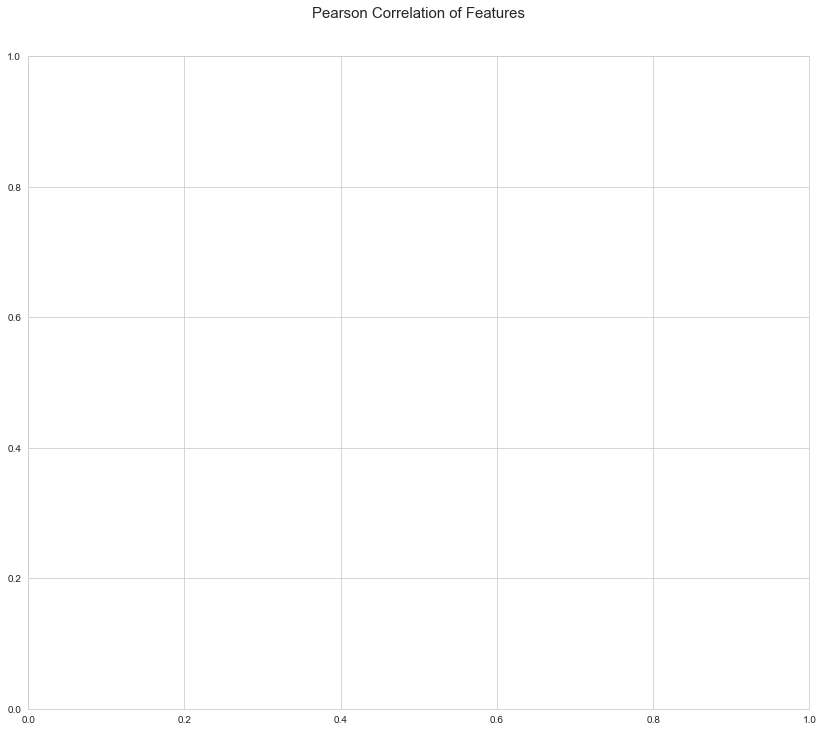

In [30]:
# pos correlation chart
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()

In [ ]:
### barcharts to compare
plotColors = ['#3498DB','#E74C3C','#BDC3C7']
firstLabels = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
nrows, ncols = 2,3
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstSort.index,y=firstSort[firstSort.columns[i-1]],palette=plotColors)
    ax.set_ylabel('Count')
    ax.yaxis.set_ticklabels([])
    ax.set_title(firstLabels[i-1])

In [32]:
# most picked and most ban, most spells
Picks = df.loc[:,['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']]
picksum = Picks.apply(pd.Series.value_counts)
Top_Pick =picksum.sum(axis=1).sort_values(ascending = False).head(10)
Top_Pick= Top_Pick.to_frame()
# Top picked champions are - Thresh, Trist, Vayne, Kayn, Lee, Twitch, Janna, Lucian, Jhin, Jinx
sns.barplot(x= Top_Pick.index, y= Top_Pick[0], palette='rocket')
plt.title('Most Picked Champions')
plt.xticks(rotation='vertical')
plt.show()

Bans = data.loc[:,['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']]
Bansum= Bans.apply(pd.Series.value_counts)
Top_Ban= Bansum.sum(axis=1).sort_values(ascending = False).head(10)
Top_Ban= Top_Ban.to_frame()
sns.barplot(x= Top_Ban.index, y=Top_Ban[0], palette='rocket')
plt.title('Most Banned Champions')
plt.xticks(rotation='vertical')
plt.show()

Sums = data.loc[:, ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2',
                 't1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                 't2_champ5_sum1','t2_champ5_sum2']]
Sumsum= Sums.apply(pd.Series.value_counts)
Top_Sum= Sumsum.sum(axis=1).sort_values(ascending=False).head(10)
Top_Sum= Top_Sum.to_frame()
sns.barplot(x= Top_Sum.index, y=Top_Sum[0], palette='rocket')
plt.title('Most Used Summoner Spells')
plt.show()

KeyError: "None of [Index(['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id',\n       't1_champ5id', 't2_champ1id', 't2_champ2id', 't2_champ3id',\n       't2_champ4id', 't2_champ5id'],\n      dtype='object')] are in the [columns]"

In [ ]:
# cool graph with interactive cursor

import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt


trace1 = go.Scatter(
                    x = new_data["gameDuration_minutes"],
                    y = new_data["Total dragon"],
                    mode = "lines",
                    name = "dragons",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= new_data.winner)

trace2 = go.Scatter(
                    x = new_data["gameDuration_minutes"],
                    y = new_data["Total baron"],
                    mode = "lines",
                    name = "barons",
                    marker = dict(color = 'rgba(150, 5, 33, 0.8)'),
                    text= new_data.winner)


data = [trace1, trace2]

layout = dict(title = 'Baron vs Dragon',
              xaxis= dict(title= 'Minutes',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='sqft',y='logerror',data=train,hue='acres_bin', palette='colorblind')
plt.title('Sq ft and log error based on acres', fontsize = 20)
plt.show()

# Model 

In [ ]:
#Preprocessing from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Algos from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Postprocessing from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)

clf2 = SVC(kernel="linear", C=0.025)
clf2.fit(X_train, y_train)

clf3 = XGBClassifier()
clf3.fit(X_train, y_train)

cl4 = KNeighborsClassifier()
cl4.fit(X_train, y_train)

print("Logistic Regr. Score = ", clf.score(X_test, y_test))
print("SVC Linear Kernel Score = ", clf2.score(X_test, y_test))
print("XGBoost Score = ", clf3.score(X_test, y_test))
print("KNN Score = ", cl4.score(X_test, y_test))